# Objective

The **Automotive Industry** continues to face a dynamic set of challenges. For those with right ambition it represents an exiting time with opportunities to differentiate and stand out from the crowd. One area that has the opportunity to deliver significant competitive advantage is analytics. 

The main objective of this report is to analyze the data of **Automotive Industry** and gather all the insights from it to understand the Indian market of cars from the given set of features. The topics of the analysis i.e. questions to answer from the analysis will be:-
- Customer Segmentation: It is one of the motive of this analysis. It is important for car makers to analyze the market and counter the opponent car makers. It has several steps:-
        1. Exploretory Data Analysis
        2. Clustering Analysis
- Engine Performance:How much power or performance is favourable for Indian market.
- Body Type: Which Body Type(s) is most favourable in Indian market. 
- Safety: Do Indian market look into safety field while buying a car. 
- Fuel: Which type of fuel is used in most of the cars in India with that we can even analyze co2 emmision.
- New Technology: Do Indian market moving towards automation and new technologies which are present in cars along with the world.
- Family Car: What type of cars prefered by Indian market i.e. now-a-days people attach child seats in cars for their children which tells us that the buyer has a family and children. 

**This type of insights will effect the market and the car makers will able to understand it to gain their profits and also help us to improve the features that new world requierd**

![Data Analysis](auto.png)

# Approach

This report will follow a mathematical approach using the concept of exploratory data analysis and using the concept of clustering analysis using machine learning algorithm. It also uses the machine learning algorithm for predictive analysis of the feature caleed "price". 

# Challenge

The automotive industry is one of the largest industries out there it's a 2.6 trillion dollar industry!

But inside the industry there are too many categories and subcategories constructed by too many variables that it almost safe to say that every category is an industry of itself. for instance the car body variable is a vital one, as diffrernt body types are being used for very different reason here is a list of some car body type:
- SEDAN
- COUPE
- STATION WAGON
- HATCHBACK
- CONVERTIBLE
- SPORT-UTILITY VEHICLE (SUV)
- MINIVAN

And this just to name a few!, here is a **[Photo](http://carsonelove.com/car-body-types#prettyPhoto)** show some of car types in more details.

And all of the variety above is only regarding the car body type which is only one variable!, not to mention that there are grey areas where some car body types can be irrelevant to customer decision.

So for a car company it's really a challenge to identify its strategic group as it really takes a lot of effort to put all variable in consideration.

# Data

The **[Dataset](https://acehacker.com/microsoft/engage2022/cars_engage_2022.csv)** used in this project is provided by Microsoft Engage Program.The dataset used in this report is having the latest information about cars in the Indian market. The dataset contains cars with their variants, In dataset there are 1200+ model/variants to study. There is a variety of Makes/Models which can be studied, All prices has been converted from indian rupee to USD.

# This report will have several main part:

- [Exploratory data analysis](#Exploratory-Data-analysis)

- [Analysis based on New Technologies, Safety and other features](#Analysis-based-on-New-Technologies-,-Safety)

- [Visualization and dashboard on **Tableau** based on bellow topics](#Visualization-and-dashboard-on-Tableau-based-on-bellow-topics)
        
- [Summary of EDA](#Summary-of-EDA)

- [Cluster Analysis](#Why-to-perform-Clustering-Analysis-?)

- [Summary of Cluster Analysis](#Summary-of-Cluster-Analysis)

- [Machine Learning Model](#Price-Prediction-(-Using-Different-Machine-Learning-Algorithm-))

### Important Libraries of Python used in this project

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

### Steps performed ahead:
- Loading Data
- Cleaning Data 
- Feature Engineering
- Handling Null Values
- Converting String Values to numeric values

In [5]:
df = pd.read_csv('cars_engage_2022.csv')

In [4]:
#Checking the shape of the dataset
df.shape

(1276, 141)

### showning important features regarding the dataset

In [9]:
a_b = len(df)
b_c = len(df.Make.unique())
c_d = len(df.Model.unique())
d_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[a_b,b_c,c_d,d_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()

### Since the dataset is full of features, we will choose only a subset of useful features to work with, also we will clean the data to extract useful information

In [5]:
df['ARAI_Certified_Mileage'].head(5)

0    23.6 km/litre
1    23.6 km/litre
2              NaN
3    21.9 km/litre
4    23.6 km/litre
Name: ARAI_Certified_Mileage, dtype: object

In [14]:
df.describe()

Displacement    Cylinders  Valves_Per_Cylinder  Fuel_Tank_Capacity  \
count   1276.000000  1276.000000          1276.000000         1276.000000   
mean    1856.888715     4.361285             3.977853           51.734248   
std     1060.851668     1.619598             0.799718           16.088239   
min       72.000000     2.000000             1.000000           15.000000   
25%     1198.000000     4.000000             4.000000           41.000000   
50%     1497.000000     4.000000             4.000000           45.000000   
75%     1998.000000     4.000000             4.000000           60.000000   
max     7993.000000    16.000000            16.000000          105.000000   

             Doors  ARAI_Certified_Mileage        Gears  Ground_Clearance  \
count  1276.000000             1276.000000  1276.000000       1276.000000   
mean      4.548589               18.479691     5.804859        178.041928   
std       0.747276               41.131054     1.159584         33.308004   
min       2.000000                3.400000     2.000000        100.000000   
25%       4.000000               14.100000     5.000000        164.000000   
50%       5.000000               17.680000     5.000000        170.000000   
75%       5.000000               21.040000     6.000000        190.000000   
max       5.000000             1449.000000     9.000000        498.000000   

             Power       Torque  ...  EBA_(Electronic_Brake_Assist)  \
count  1276.000000  1276.000000  ...                    1276.000000   
mean    154.388307   266.414577  ...                       0.459248   
std     134.735670   185.362102  ...                       0.498532   
min      11.840000     8.000000  ...                       0.000000   
25%      81.860000   133.000000  ...                       0.000000   
50%     108.500000   209.000000  ...                       0.000000   
75%     170.630000   350.000000  ...                       1.000000   
max    1578.110000  1712.000000  ...                       1.000000   

       Navigation_System  Second_Row_AC_Vents  \
count        1276.000000          1276.000000   
mean            0.535266             0.528213   
std             0.498950             0.499399   
min             0.000000             0.000000   
25%             0.000000             0.000000   
50%             1.000000             1.000000   
75%             1.000000             1.000000   
max             1.000000             1.000000   

       ESP_(Electronic_Stability_Program)  Turbocharger  \
count                         1276.000000   1276.000000   
mean                             0.389498      0.515674   
std                              0.487828      0.499950   
min                              0.000000      0.000000   
25%                              0.000000      0.000000   
50%                              0.000000      1.000000   
75%                              1.000000      1.000000   
max                              1.000000      1.000000   

       ISOFIX_(Child-Seat_Mount)  Rain_Sensing_Wipers  Paddle_Shifters  \
count                1276.000000          1276.000000      1276.000000   
mean                    0.478056             0.374608         0.238245   
std                     0.499714             0.484211         0.426176   
min                     0.000000             0.000000         0.000000   
25%                     0.000000             0.000000         0.000000   
50%                     0.000000             0.000000         0.000000   
75%                     1.000000             1.000000         0.000000   
max                     1.000000             1.000000         1.000000   

       Leather_Wrapped_Steering         price  
count               1276.000000  1.276000e+03  
mean                   0.460031  6.435122e+04  
std                    0.498595  1.700629e+05  
min                    0.000000  3.310000e+03  
25%                    0.000000  1.041425e+04  
50%                    0.000000  1.484050e+04  
75

In [7]:
df.isnull().sum()

Unnamed: 0              0
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64

In [8]:
pd.DataFrame(df.info(141))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 141 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Unnamed: 0                                 int64  
 1    Make                                       object 
 2    Model                                      object 
 3    Variant                                    object 
 4    Ex-Showroom_Price                          object 
 5    Displacement                               object 
 6    Cylinders                                  float64
 7    Valves_Per_Cylinder                        float64
 8    Drivetrain                                 object 
 9    Cylinder_Configuration                     object 
 10   Emission_Norm                              object 
 11   Engine_Location                            object 
 12   Fuel_System                                object 
 13   Fuel_Tank_Capacity             

Empty DataFrame
Columns: []
Index: []

In [9]:
pd.DataFrame(df.columns).head(39)

0
0                       Unnamed: 0
1                             Make
2                            Model
3                          Variant
4                Ex-Showroom_Price
5                     Displacement
6                        Cylinders
7              Valves_Per_Cylinder
8                       Drivetrain
9           Cylinder_Configuration
10                   Emission_Norm
11                 Engine_Location
12                     Fuel_System
13              Fuel_Tank_Capacity
14                       Fuel_Type
15                          Height
16                          Length
17                           Width
18                       Body_Type
19                           Doors
20                    City_Mileage
21                 Highway_Mileage
22          ARAI_Certified_Mileage
23  ARAI_Certified_Mileage_for_CNG
24                     Kerb_Weight
25                           Gears
26                Ground_Clearance
27                    Front_Brakes
28                     Rear_Brakes
29                Front_Suspension
30                 Rear_Suspension
31                     Front_Track
32                      Rear_Track
33                Front_Tyre_&_Rim
34                 Rear_Tyre_&_Rim
35                  Power_Steering
36                   Power_Windows
37                     Power_Seats
38                   Keyless_Entry

In [10]:
df['Gear_Shift_Reminder'].isnull().sum()

543

In [197]:
df.isnull().sum().tail(60)

Front_Track                                  0
Rear_Track                                   0
Power_Steering                               0
Power_Windows                                0
Power_Seats                                  0
Keyless_Entry                                0
Power                                        0
Torque                                       0
Seating_Capacity                             0
Seats_Material                               0
Type                                         0
Start_/_Stop_Button                          0
Audiosystem                                  0
Average_Fuel_Consumption                     0
Basic_Warranty                               0
Bluetooth                                    0
Boot-lid_Opener                              0
Boot_Space                                   0
Central_Locking                              0
Child_Safety_Locks                           0
Distance_to_Empty                            0
Door_Pockets 

In [78]:
df.shape

(1276, 89)

In [195]:
df['EBA_(Electronic_Brake_Assist)']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1271    NaN
1272    NaN
1273    NaN
1274    NaN
1275    Yes
Name: EBA_(Electronic_Brake_Assist), Length: 1276, dtype: object

In [141]:
df['Third_Row_AC_Vents'] = df['Third_Row_AC_Vents'].fillna('')

In [76]:
df.drop(['Minimum_Turning_Radius'], axis=1, inplace=True)

In [32]:
df.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

#### Going to replace the null values with mode for categorical values and mean for numeric values also going to replace some null values with no since the null values in those columns means the feature is not present

In [179]:
df['Seat_Height_Adjustment'] = df['Seat_Height_Adjustment'].replace(to_replace=np.nan , value='Manual Adjustment')

In [196]:
df['EBA_(Electronic_Brake_Assist)'] = df['EBA_(Electronic_Brake_Assist)'].replace(to_replace=np.nan , value='No')

In [17]:
df.drop(['Wheelbase'], axis=1, inplace=True)

In [18]:
df.drop(['Heated_Seats', 'Recommended_Tyre_Pressure', 'Apple_CarPlay' ,'Android_Auto','Walk_Away_Auto_Car_Lock' ,'Voice_Recognition', 'Passenger_Side_Seat-Belt_Reminder' ,'Lane_Watch_Camera/_Side_Mirror_Camera', 'High_Speed_Alert_System' ,'Drive_Modes' ,'Ambient_Lightning' ,'3_Point_Seat-Belt_in_Middle_Rear_Seat'], axis=1, inplace=True)

#### going to replace the symbols with nothing to get the numeric values from the categorical values.

In [7]:
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs' , '')
df['Ex-Showroom_Price'] =df['Ex-Showroom_Price'].str.replace(',' , '')

In [8]:
df['Ex-Showroom_Price'] =df['Ex-Showroom_Price'].str.replace('.' , '')
df.head()

Unnamed: 0  Make      Model  Variant Ex-Showroom_Price Displacement  \
0           0  Tata  Nano Genx       Xt            292667       624 cc   
1           1  Tata  Nano Genx       Xe            236447       624 cc   
2           2  Tata  Nano Genx  Emax Xm            296661       624 cc   
3           3  Tata  Nano Genx      Xta            334768       624 cc   
4           4  Tata  Nano Genx       Xm            272223       624 cc   

   Cylinders  Valves_Per_Cylinder              Drivetrain  \
0        2.0                  2.0  RWD (Rear Wheel Drive)   
1        2.0                  2.0  RWD (Rear Wheel Drive)   
2        2.0                  2.0  RWD (Rear Wheel Drive)   
3        2.0                  2.0  RWD (Rear Wheel Drive)   
4        2.0                  2.0  RWD (Rear Wheel Drive)   

  Cylinder_Configuration Emission_Norm   Engine_Location Fuel_System  \
0                In-line         BS IV  Rear, Transverse   Injection   
1                In-line         BS IV  Rear, Transverse   Injection   
2                In-line         BS IV  Rear, Transverse   Injection   
3                In-line         BS IV  Rear, Transverse   Injection   
4                In-line         BS IV  Rear, Transverse   Injection   

  Fuel_Tank_Capacity Fuel_Type   Height   Length    Width  Body_Type  Doors  \
0          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
1          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
2          15 litres       CNG  1652 mm  3164 mm  1750 mm  Hatchback    4.0   
3          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
4          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   

   ... Rear_Center_Armrest iPod_Compatibility  \
0  ...                 NaN                NaN   
1  ...                 NaN                NaN   
2  ...                 NaN                NaN   
3  ...                 NaN                NaN   
4  ...                 NaN                NaN   

  ESP_(Electronic_Stability_Program) Cooled_Glove_Box  \
0                                NaN              NaN   
1                                NaN              NaN   
2                                NaN              NaN   
3                                NaN              NaN   
4                                NaN              NaN   

  Recommended_Tyre_Pressure Heated_Seats Turbocharger  \
0                       NaN          NaN          NaN   
1                       NaN          NaN          NaN   
2                       NaN          NaN          NaN   
3                       NaN          NaN          NaN   
4                       NaN          NaN          NaN   

  ISOFIX_(Child-Seat_Mount) Rain_Sensing_Wipers Paddle_Shifters  \
0                       NaN                 NaN             NaN   
1                       NaN                 NaN             NaN   
2                       NaN                 NaN             NaN   
3                       NaN                 NaN             NaN   
4                       NaN                 NaN             NaN   

  Leather_Wrapped_Steering Automatic_Headlamps Engine_Type  \
0                      NaN                 NaN         NaN   
1                      NaN                 NaN         NaN   
2                      NaN                 NaN         NaN   
3                      NaN                 NaN         NaN   
4                      NaN                 NaN         NaN   

  ASR_/_Traction_Control Cruise_Control USB_Ports Heads-Up_Display  \
0                    NaN            NaN       NaN              NaN   
1                    NaN            NaN       NaN              NaN   
2                    NaN            NaN       NaN              NaN   
3                    NaN            NaN       NaN              NaN   
4                    NaN            NaN       NaN              NaN   

  Welcome_Lights Battery Electric_Range  
0            NaN     NaN            NaN  
1            NaN     

In [21]:
df['Number_of_Airbags'] = df['Number_of_Airbags'].fillna(df['Number_of_Airbags'].mean()) 

In [22]:
df.drop(['Compression_Ratio'], axis=1, inplace=True)

In [23]:
df.drop(['Welcome_Lights'], axis=1, inplace=True)

In [139]:
df['Sun_Visor'] = df['Sun_Visor'].fillna(df['Sun_Visor'].mode()[0])

In [120]:
df['Torque'] = df['Torque'].fillna(df['Torque'].mode()[0])

In [126]:
df['Power_Windows'] = df['Power_Windows'].fillna(df['Power_Windows'].mode()[0])

In [27]:
df['Bluetooth'] = df['Bluetooth'].fillna(df['Seats_Material'].mode()[0])

In [28]:
df['Rear_Tyre_&_Rim'] = df['Rear_Tyre_&_Rim'].fillna(df['Rear_Tyre_&_Rim'].mode()[0])

In [29]:
df['Front_Tyre_&_Rim'] = df['Front_Tyre_&_Rim'].fillna(df['Front_Tyre_&_Rim'].mode()[0])

In [30]:
df['Rear_Track'] = df['Rear_Track'].fillna(df['Rear_Track'].mode()[0])

In [31]:
df['Front_Track'] = df['Front_Track'].fillna(df['Front_Track'].mode()[0])

In [143]:
df['Ventilation_System'] = df['Ventilation_System'].fillna(method = 'bfill')

In [33]:
df['Front_Suspension'] = df['Front_Suspension'].fillna(method = 'bfill')

In [34]:
df['Rear_Brakes'] = df['Rear_Brakes'].fillna(df['Rear_Brakes'].mode()[0])

In [35]:
df['Front_Brakes'] = df['Front_Brakes'].fillna(df['Front_Brakes'].mode()[0])

In [36]:
df['Ground_Clearance'] = df['Ground_Clearance'].fillna(method = 'bfill')

In [37]:
df['Kerb_Weight'] = df['Kerb_Weight'].fillna(df['Kerb_Weight'].mode()[0])

In [38]:
df.drop(['Highway_Mileage'], axis=1, inplace=True)

In [39]:
df.drop(['City_Mileage'], axis=1, inplace=True)

In [40]:
df['Doors'] = df['Doors'].fillna(df['Doors'].mean()) 

In [41]:
df['Body_Type'] = df['Body_Type'].fillna(df['Body_Type'].mode()[0])

In [42]:
df['Width'] = df['Width'].fillna(method = 'bfill')

In [43]:
df['Length'] = df['Length'].str.replace('mm' , '')

In [44]:
df['Width'] = df['Width'].str.replace('mm' , '')

In [45]:
df['Height'] = df['Height'].fillna(method = 'bfill')

In [46]:
df['Height'] = df['Height'].str.replace('mm' , '')

In [47]:
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].fillna(df['Fuel_Tank_Capacity'].mode()[0])

In [48]:
df['Fuel_System'] = df['Fuel_System'].fillna(df['Fuel_System'].mode()[0])

In [49]:
df['Engine_Location'] = df['Engine_Location'].fillna(df['Engine_Location'].mode()[0])

In [319]:
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].fillna(df['Valves_Per_Cylinder'].mean()) 


In [50]:
df['Make'] = df['Make'].fillna(df['Make'].mode()[0])

In [10]:
df['Displacement'] = df['Displacement'].str.replace('cc' , '')

In [11]:
df['Displacement'] = df['Displacement'].fillna(method = 'pad')

In [53]:
df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].mean()) 

In [54]:
df['Valves_Per_Cylinder'] = df['Valves_Per_Cylinder'].fillna(df['Valves_Per_Cylinder'].mean()) 

In [55]:
df['Drivetrain'] = df['Drivetrain'].fillna(df['Drivetrain'].mode()[0])

In [56]:
df['Cylinder_Configuration'] = df['Cylinder_Configuration'].fillna(df['Cylinder_Configuration'].mode()[0])

In [57]:
df['Emission_Norm'] = df['Emission_Norm'].fillna(df['Emission_Norm'].mode()[0])

In [200]:
df.isnull().sum()

Unnamed: 0                   0
Make                         0
Model                        0
Variant                      0
Ex-Showroom_Price            0
                            ..
Turbocharger                 0
ISOFIX_(Child-Seat_Mount)    0
Rain_Sensing_Wipers          0
Paddle_Shifters              0
Leather_Wrapped_Steering     0
Length: 89, dtype: int64

In [202]:
pd.DataFrame(df.columns).head(60)

0
0                       Unnamed: 0
1                             Make
2                            Model
3                          Variant
4                Ex-Showroom_Price
5                     Displacement
6                        Cylinders
7              Valves_Per_Cylinder
8                       Drivetrain
9           Cylinder_Configuration
10                   Emission_Norm
11                 Engine_Location
12                     Fuel_System
13              Fuel_Tank_Capacity
14                       Fuel_Type
15                          Height
16                          Length
17                           Width
18                       Body_Type
19                           Doors
20          ARAI_Certified_Mileage
21  ARAI_Certified_Mileage_for_CNG
22                     Kerb_Weight
23                           Gears
24                Ground_Clearance
25                    Front_Brakes
26                     Rear_Brakes
27                Front_Suspension
28                 Rear_Suspension
29                     Front_Track
30                      Rear_Track
31                  Power_Steering
32                   Power_Windows
33                     Power_Seats
34                   Keyless_Entry
35                           Power
36                          Torque
37                Seating_Capacity
38                  Seats_Material
39                            Type
40             Start_/_Stop_Button
41                     Audiosystem
42        Average_Fuel_Consumption
43                  Basic_Warranty
44                       Bluetooth
45                 Boot-lid_Opener
46                      Boot_Space
47                 Central_Locking
48              Child_Safety_Locks
49               Distance_to_Empty
50                    Door_Pockets
51        Engine_Malfunction_Light
52               Extended_Warranty
53                        FM_Radio
54                 Fuel-lid_Opener
55                      Fuel_Gauge
56                       Handbrake
57              Instrument_Console
58                Low_Fuel_Warning
59           Multifunction_Display

In [238]:
df['Boot_Space'] = df['Boot_Space'].str.replace('litres' , '')
df['Ex-Showroom_Price'].head(19)

0     292667
1     236447
2     296661
3     334768
4     272223
5     314815
6     279650
7     351832
8     333419
9     362000
10    390000
11    437065
12    353290
13    283290
14    383290
15    413290
16    433290
17    454490
18    463290
Name: Ex-Showroom_Price, dtype: int32

In [12]:
df[['Displacement' ,'Ex-Showroom_Price' ]] = df[['Displacement' ,'Ex-Showroom_Price' ]].astype(int)

In [ ]:
df[['Height' ,'Length', 'Width' ]] = df[['Height' ,'Length', 'Width' ]].astype(float)

In [239]:
df[['Horsepower','Rpm']] = df.Power.str.split('@' , expand=True)

In [267]:
df.columns
df.shape
df['Horsepower']
df.shape

(1276, 91)

In [247]:
df['Horsepower'] = df['Horsepower'].str.replace('PS' , '')

In [245]:
df['Rpm'] = df['Rpm'].str.replace('rpm' , '')

# Exploratory Data analysis


### Creating a correlation heatmap which will show a graphical representation of a correlation matrix representing the correlation between different variables.

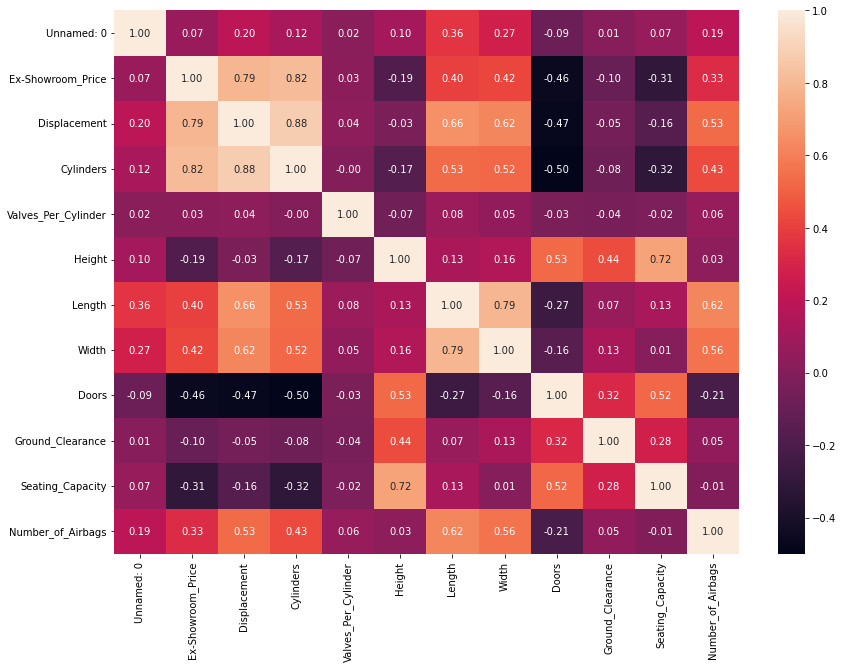

In [250]:
df[['Cylinders', 'Valves_Per_Cylinder', 'Doors', 'Seating_Capacity', 'Number_of_Airbags', 'Ex-Showroom_Price', 'Displacement']] = df[['Cylinders', 'Valves_Per_Cylinder', 'Doors', 'Seating_Capacity', 'Number_of_Airbags', 'Ex-Showroom_Price', 'Displacement']].apply(pd.to_numeric)
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

**Ex-Showroom price is positively correlated to Displacement.**

**Ex-Showroom Price is Positively Correlated to the number of Cylinders. This means, more the number of cylinders, more the ex-showroom price.**

**The more the number of cylinders in a car, the more will be its displacement. Generally speaking, the higher an engine’s displacement the more power it can create.**

**The number of doors is highly negatively correlated with Displacement. That makes sense, right?**

### Brands with the most number of cars in the Indian market

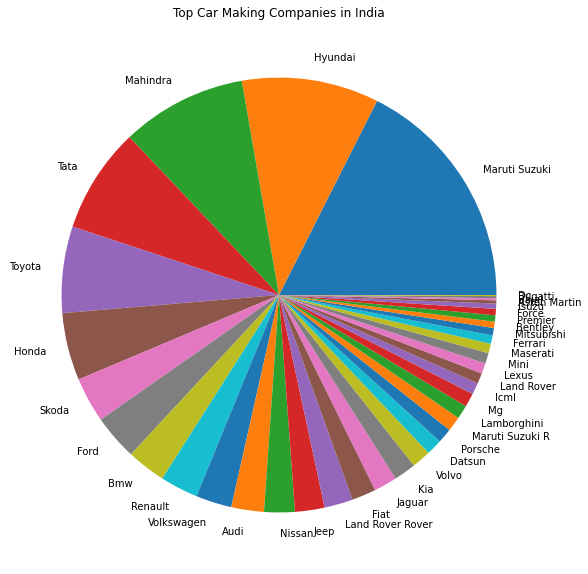

In [251]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Make.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India")
plt.show()

**Maruti Suzuki has more car variants than any other company in India.**

**The Top 5 companies with more than car variants in India are Maruti Suzuki, Hyundai, Mahindra, Tata, and Toyota.**

**Sports car variants are very low**

### Which car body type is favourable for Indian Market

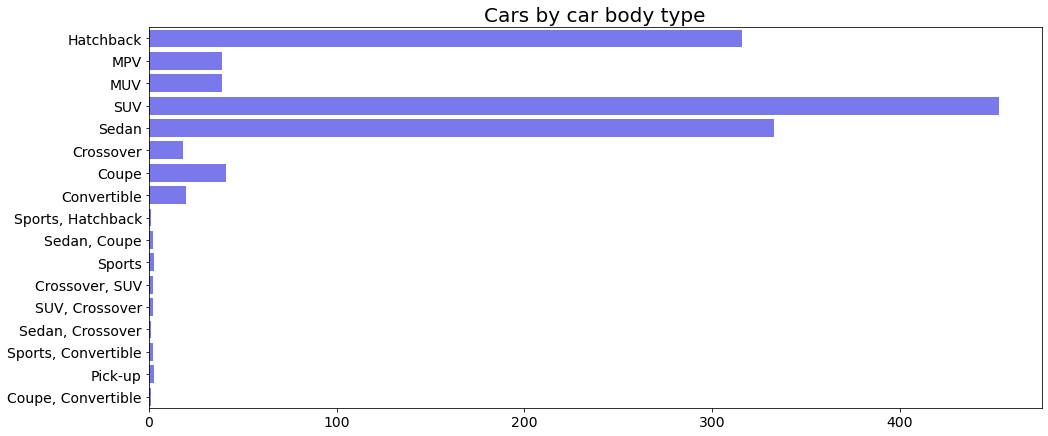

In [252]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='Body_Type',alpha=.6,color='blue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

### Indian market is favourable for SUVs, sedans, and Hatchback.

### EX-Showroom Price based on car body type: which body type has more price

In [13]:
PriceByType = df.groupby('Body_Type').sum().sort_values('Ex-Showroom_Price', ascending=False)
PriceByType = PriceByType.reset_index()
px.bar(x='Body_Type', y ="Ex-Showroom_Price", data_frame=PriceByType)

### If we some up all the SUVs Ex-Showroom price present in the Dataset then it will be nearly 2B INR

### Now we check the relation between horsepower and price considering diffreent body type

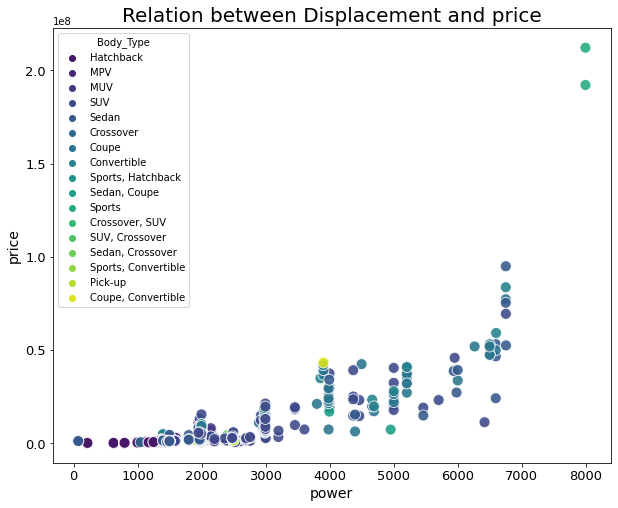

In [254]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Displacement', y='Ex-Showroom_Price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Engine Displacement',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between Displacement and price',fontsize=20);

### Horsepower of car seems to be highly related to car price but car body type seems a little bit blurry but hatchbacls seems to be the body type with the least horsepower and price

In [49]:
PriceByType = df.groupby('Body_Type').sum().sort_values('price', ascending=False)
PriceByType = PriceByType.reset_index()
px.bar(x='Body_Type', y ="price", data_frame=PriceByType)

### Cars count by Engine Fuel Type

<AxesSubplot:xlabel='price', ylabel='Fuel_Type'>

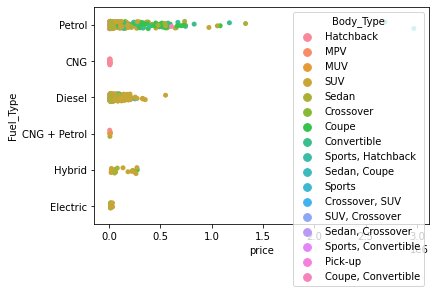

In [47]:
sns.stripplot(x='price' , y='Fuel_Type' ,data=df, hue='Body_Type')

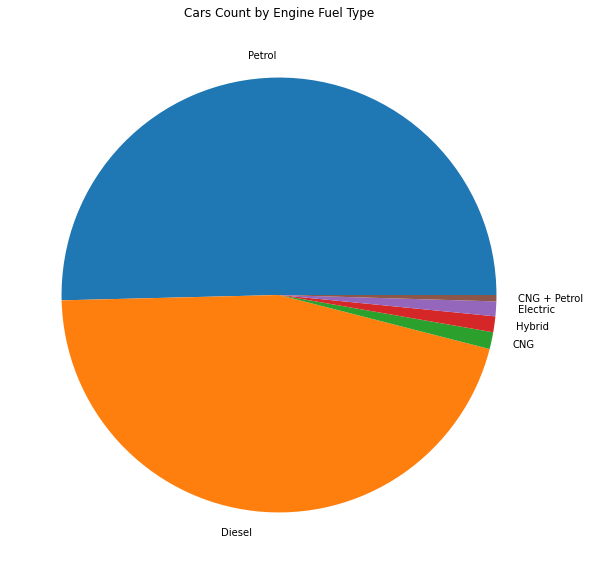

In [50]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Fuel_Type.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Engine Fuel Type")
plt.show()

**Almost 90% of Indian cars run on Petrol or Diesel. This is Scary if we see it from an Environment point of view.**

**This data is going to change because electric vehicles have arrived in India.**

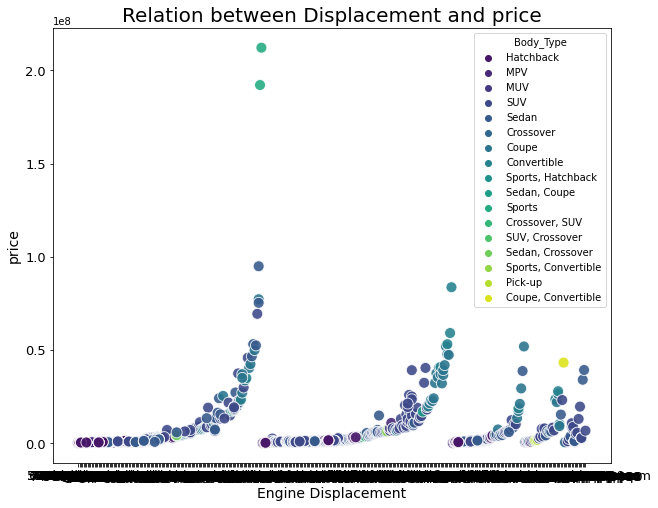

In [257]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Power', y='Ex-Showroom_Price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Engine Displacement',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between Displacement and price',fontsize=20);

### Pair plot between displacement and ex-showroom price with color differentiation based on fuel type

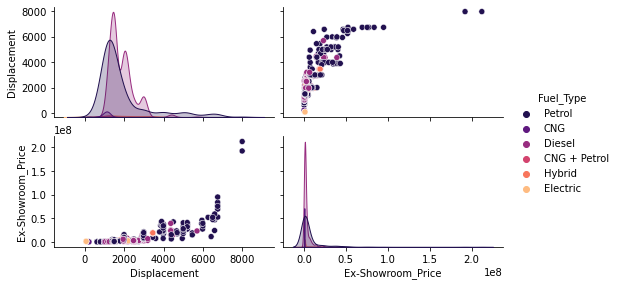

In [258]:
sns.pairplot(df,vars=[ 'Displacement', 'Ex-Showroom_Price'], hue= 'Fuel_Type', palette=sns.color_palette('magma'),diag_kind='kde',height=2, aspect=1.8);

**Pair plot visualization comes in handy when you want to go for Exploratory data analysis (“EDA”). Pair plot visualizes given data to find the relationship between them where the variables can be continuous or categorical.**

In [17]:
fig = px.scatter_3d(df, x='Displacement', z='price', y='Fuel_Type',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();


**From the above analysis we noticed that most of the cars are running on petrol and diesel which causes a lot of polution and cause of** **CO2** **emission. This data will get change in the coming years since more and more people are shiefting towards electric cars and brands like Tesla , Tata etc are also building new models on electric cars**

**Cleaning and Feature Engineering for further deep analysis**  

In [262]:
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))

In [263]:
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP
df.Doors = df.Doors.astype(int)

In [264]:
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)

In [266]:
pd.DataFrame(df.columns)

0
0                 Unnamed: 0
1                       Make
2                      Model
3                    Variant
4               Displacement
..                       ...
86           Paddle_Shifters
87  Leather_Wrapped_Steering
88                Horsepower
89                       Rpm
90                     price

[91 rows x 1 columns]

In [268]:
df.drop(['Horsepower','Rpm'], axis=1, inplace=True)

In [271]:
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '22.4-21.9 km/litre','ARAI_Certified_Mileage'] = '22.4'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)

### Now we check the distribution of some features in the dataset¶
**First we Check the price distribution, we will use both normal and log scales due to the huge difference in prices.**

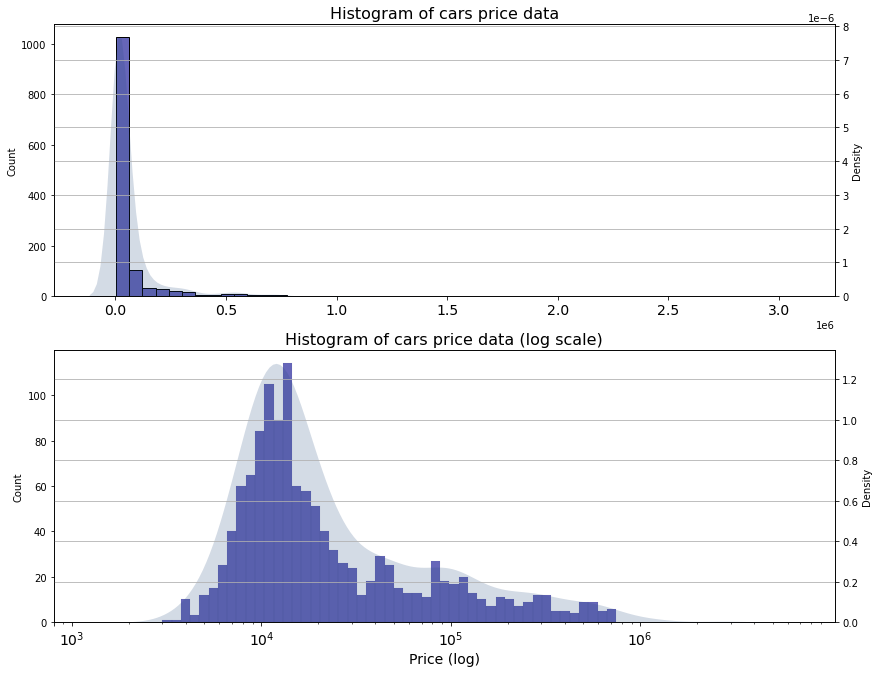

In [272]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

**Seems like there is a lot of varaince in price we can check that by plotting a box plot.**

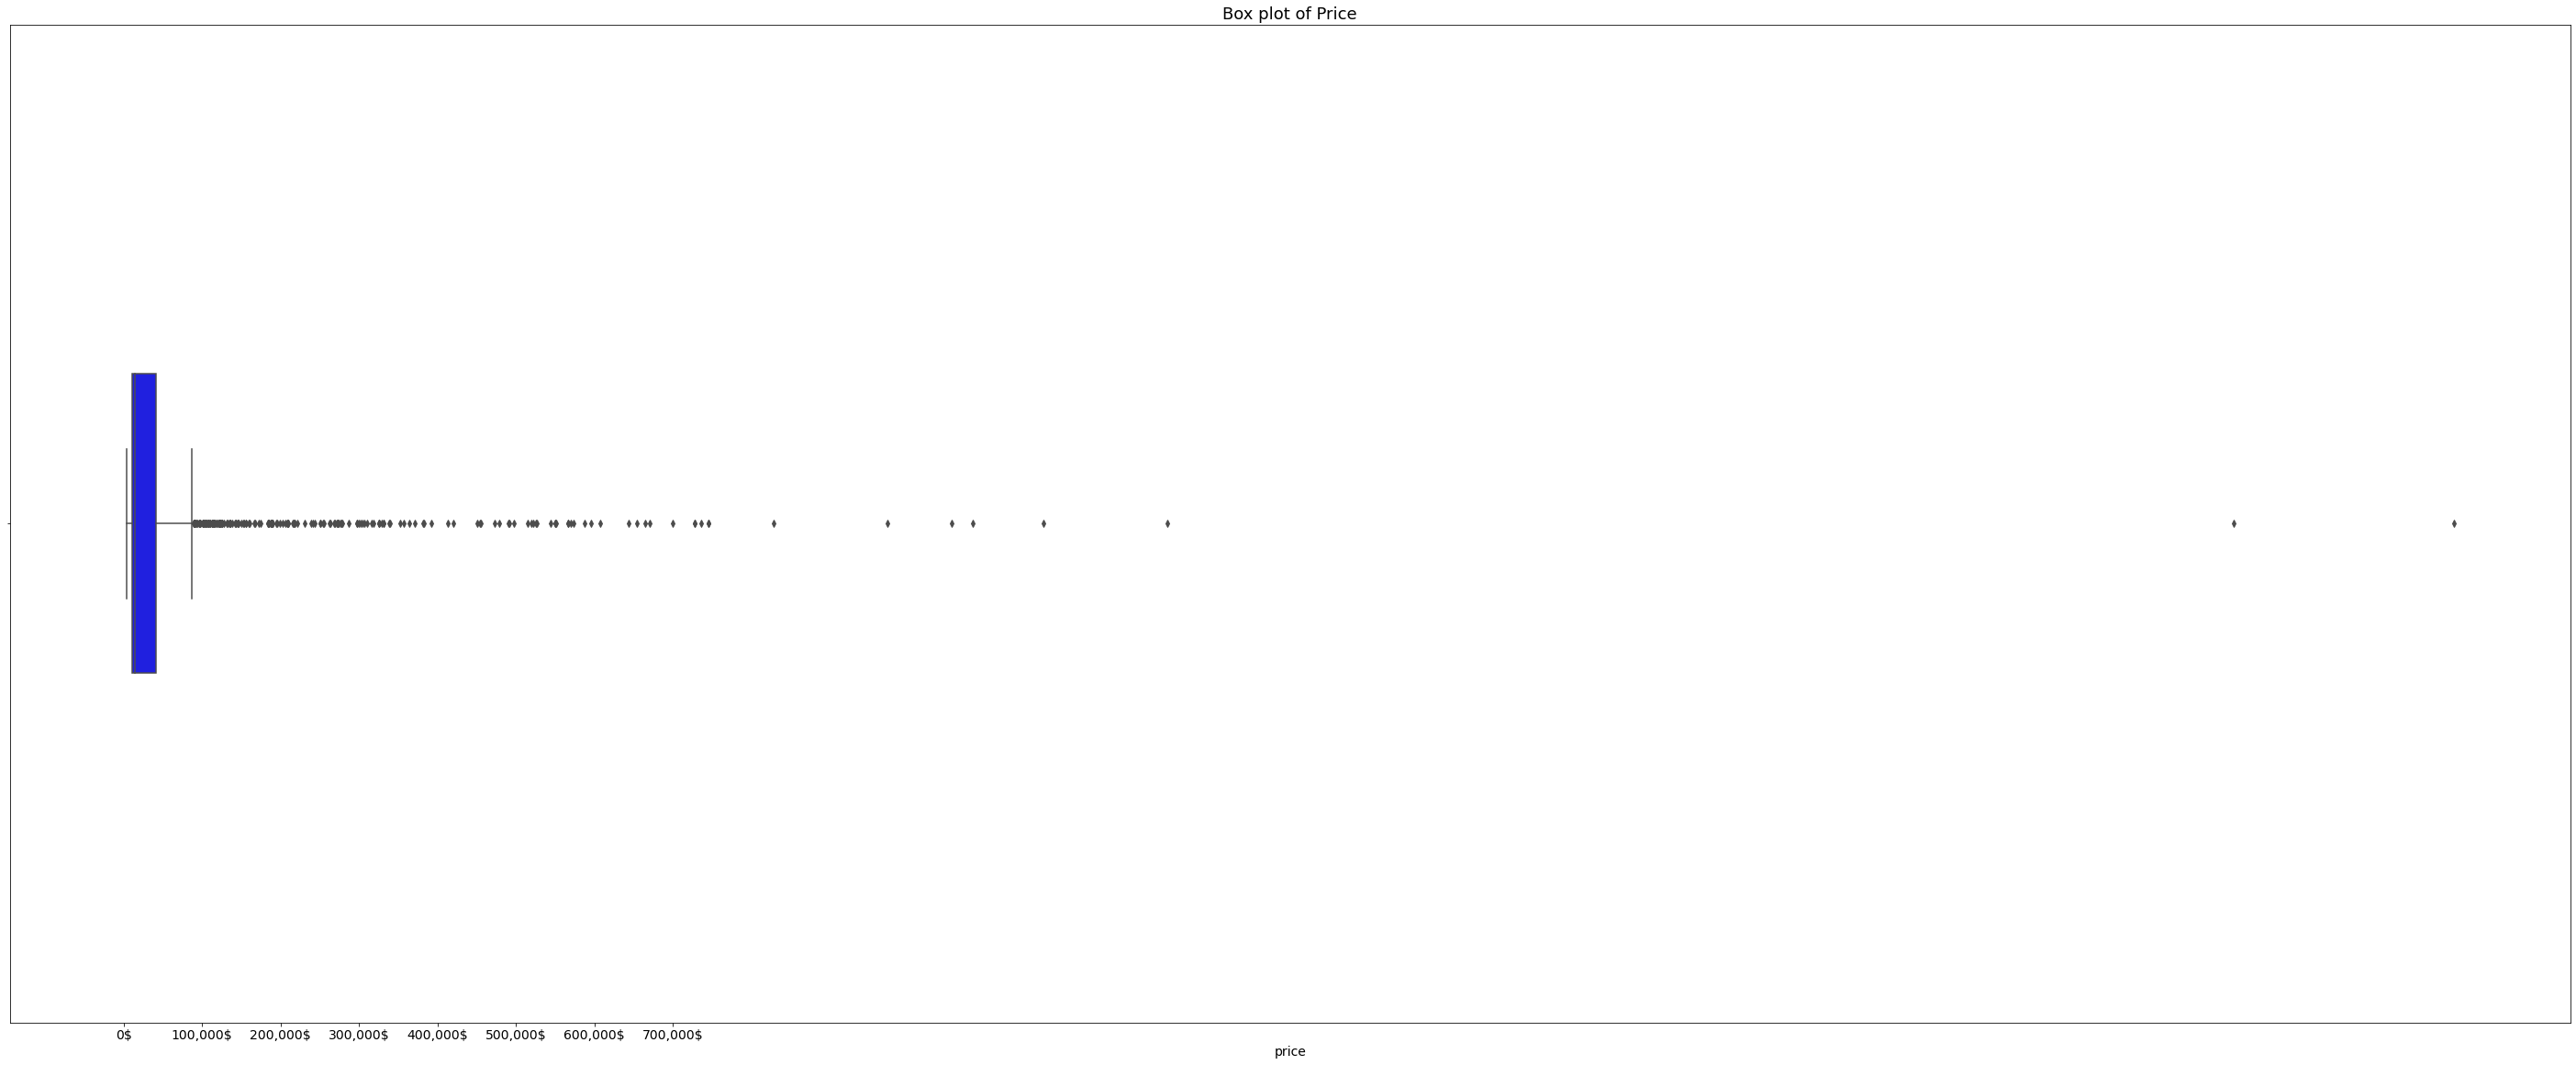

In [278]:
plt.figure(figsize=(50,20))
sns.boxplot(data=df, x='price',width=.3,color='blue', hue= 'Fuel_Type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('price',fontsize=14);

**Seems that there is a lot of outliers that form a very different type(s) of cars or to be mor exact there are very different categories in the automotive market**

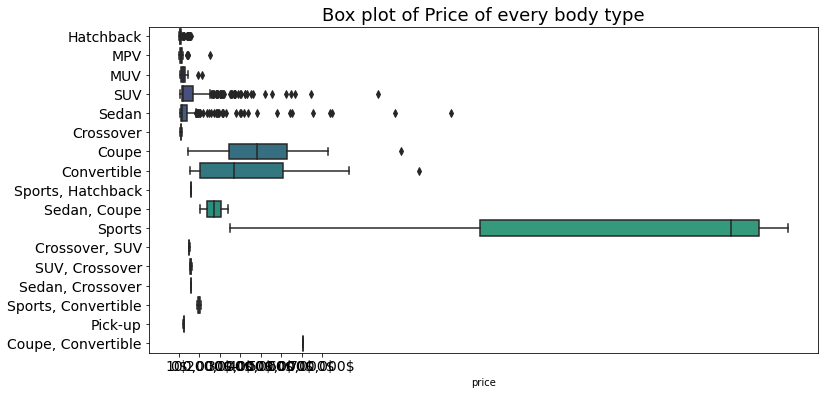

In [280]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price', y='Body_Type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

**It's Clear that Car body type strongly affect the price**

### Now we check car by engine size

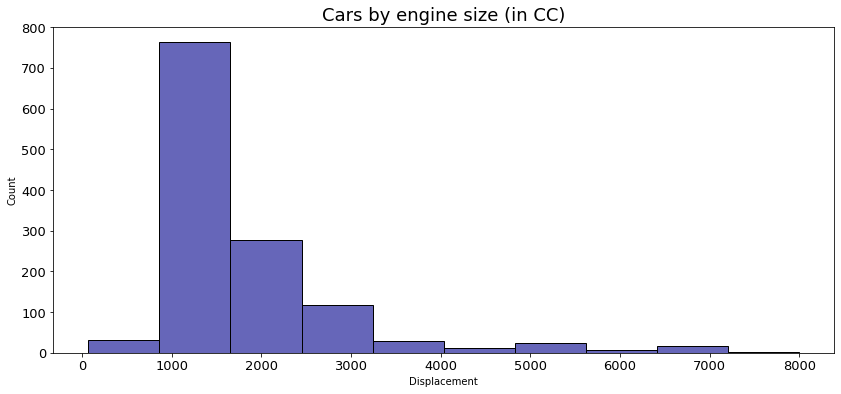

In [282]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

**Seems like most of cars have engine size in the 1000:2000cc range**

### Now We check the Horsepower of cars

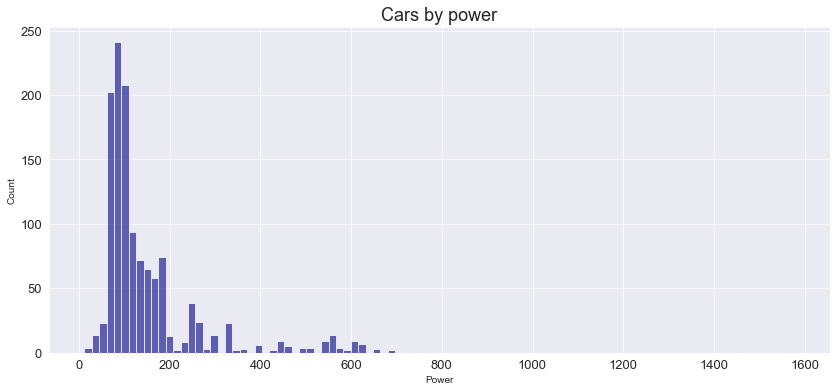

In [18]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Power',alpha=.6, color='darkblue')
plt.title('Cars by power',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

### Now we check the relation horsepower and price considering diffreent body type

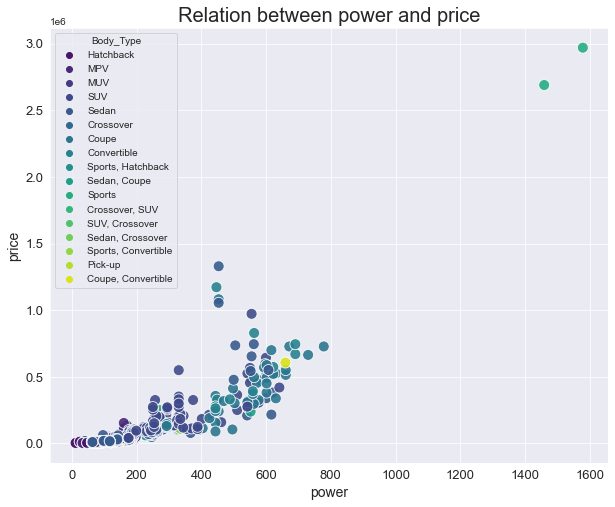

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Power', y='price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between power and price',fontsize=20);

Horsepower of car seems to be highly related to car price but car body type seems a little bit blurry but hatchbacls seems to be the body type with the least horsepower and price

**We can also check the overall correlation of between variables and each other
First we make a pearson correlation grid**

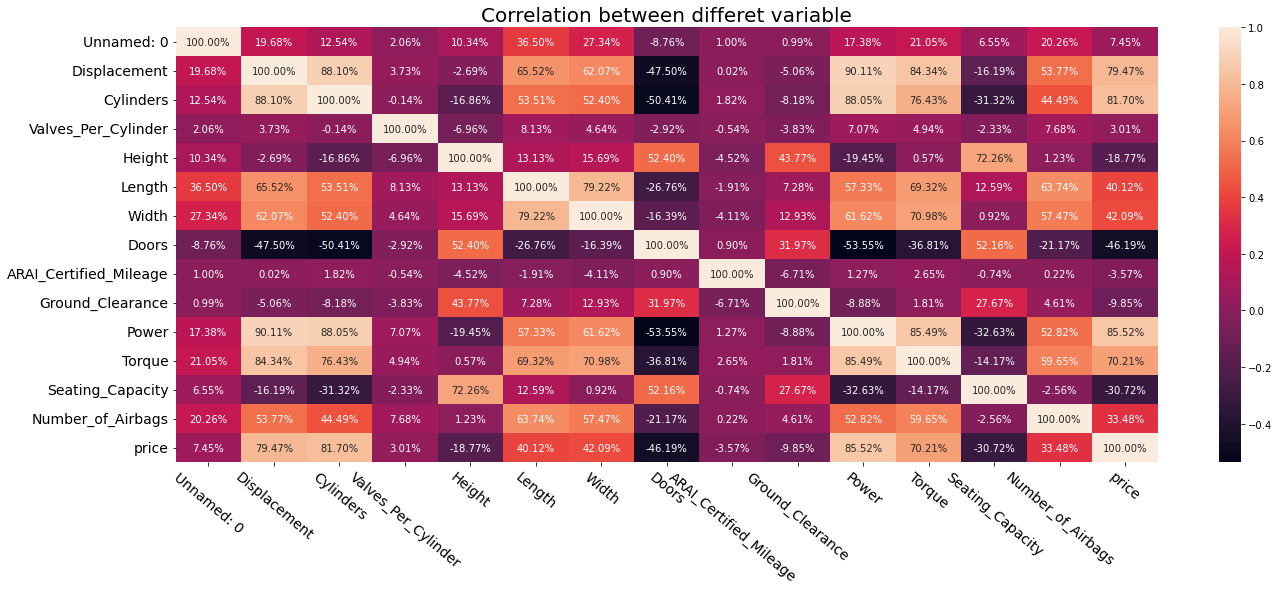

In [295]:
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.title('Correlation between differet variable',fontsize=20)
plt.xticks(fontsize=14, rotation=320)
plt.yticks(fontsize=14);

**Now we check an extensive scatter plot grid of more numerical variable to investigate the realtion in more detail**

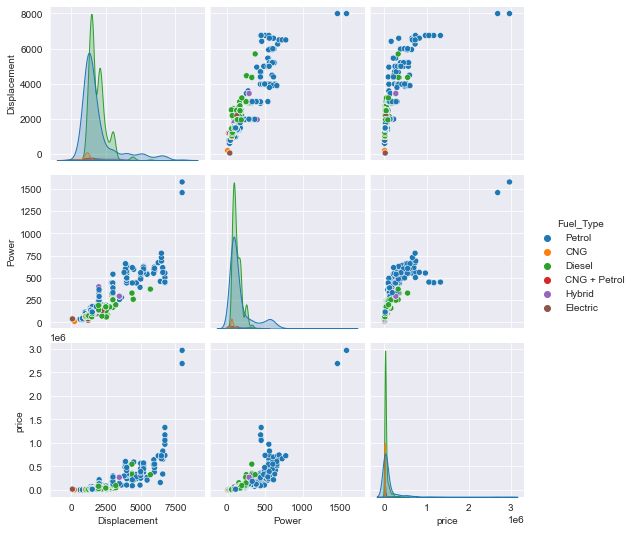

In [22]:
sns.pairplot(df,vars=[ 'Displacement','Power', 'price'], hue= 'Fuel_Type')


In [23]:
fig = px.scatter_3d(df, x='Power', z='price', y='ARAI_Certified_Mileage',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

As shown in previous figures clustring the market needs a lot of effort as the separation of clusters is not that obvious

In [ ]:
df.to_csv("Final_df.csv")

In [10]:
# df = pd.read_csv("Final_df.csv")
pd.DataFrame(df.columns).head(60)

0
0                       Unnamed: 0
1                             Make
2                            Model
3                          Variant
4                     Displacement
5                        Cylinders
6              Valves_Per_Cylinder
7                       Drivetrain
8           Cylinder_Configuration
9                    Emission_Norm
10                 Engine_Location
11                     Fuel_System
12              Fuel_Tank_Capacity
13                       Fuel_Type
14                          Height
15                          Length
16                           Width
17                       Body_Type
18                           Doors
19          ARAI_Certified_Mileage
20  ARAI_Certified_Mileage_for_CNG
21                     Kerb_Weight
22                           Gears
23                Ground_Clearance
24                    Front_Brakes
25                     Rear_Brakes
26                Front_Suspension
27                 Rear_Suspension
28                     Front_Track
29                      Rear_Track
30                  Power_Steering
31                   Power_Windows
32                     Power_Seats
33                   Keyless_Entry
34                           Power
35                          Torque
36                Seating_Capacity
37                  Seats_Material
38                            Type
39             Start_/_Stop_Button
40                     Audiosystem
41        Average_Fuel_Consumption
42                  Basic_Warranty
43                       Bluetooth
44                 Boot-lid_Opener
45                      Boot_Space
46                 Central_Locking
47              Child_Safety_Locks
48               Distance_to_Empty
49                    Door_Pockets
50        Engine_Malfunction_Light
51               Extended_Warranty
52                        FM_Radio
53                 Fuel-lid_Opener
54                      Fuel_Gauge
55                       Handbrake
56              Instrument_Console
57                Low_Fuel_Warning
58           Multifunction_Display
59                       Sun_Visor

**Going to check Ground clearence with price**

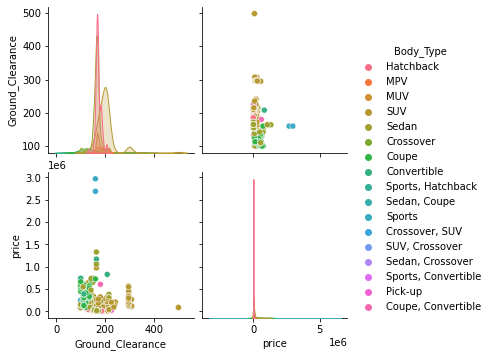

In [7]:
sns.pairplot(df,vars=['Ground_Clearance', 'price'], hue= 'Body_Type')


It looks decent so indian market doesnot go for much heighted cars

**Going to check for brakes in cars since it is an important feature for safety purpose

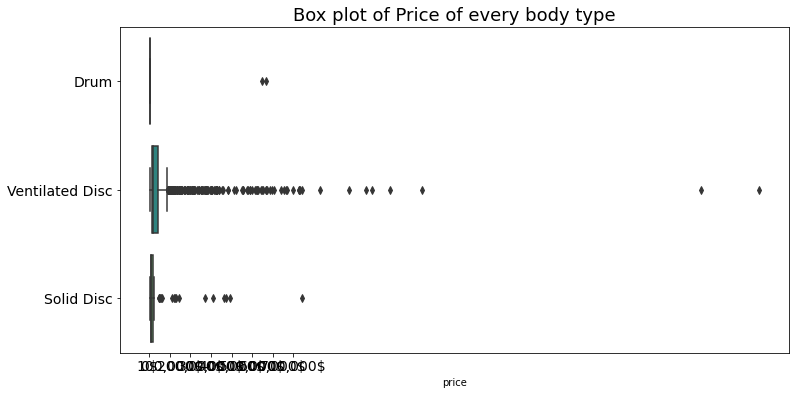

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price', y='Front_Brakes', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

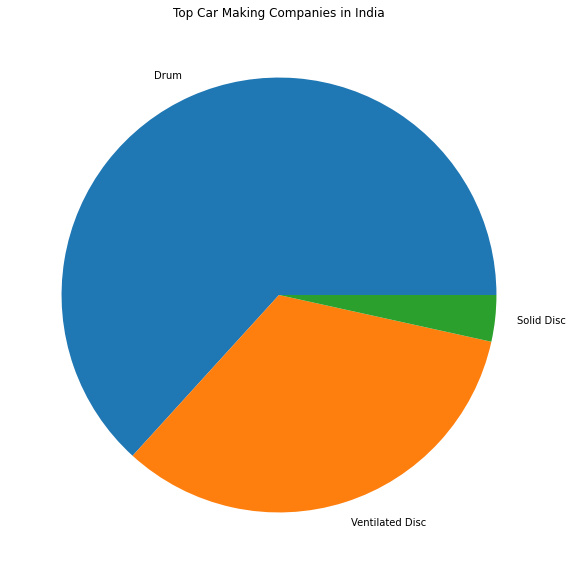

In [17]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Rear_Brakes.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India")
plt.show()

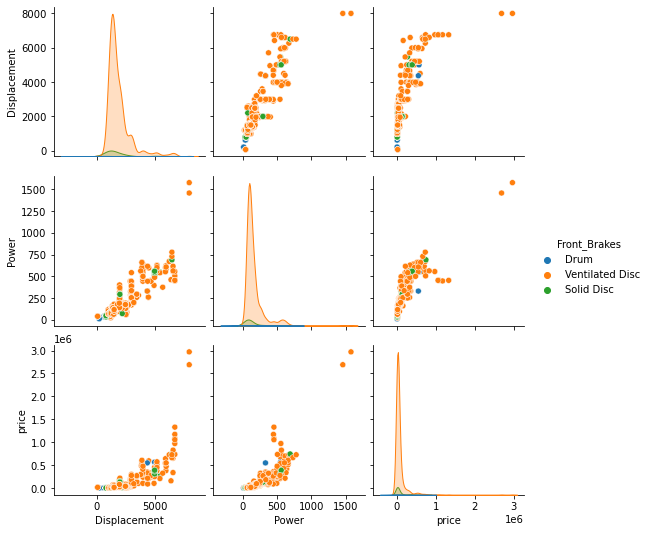

In [20]:
sns.pairplot(df,vars=[ 'Displacement','Power', 'price'], hue= 'Front_Brakes')



**It looks Indian market takes good care of safety since ventilated disc is presnt in most of the cars**

In [22]:
df['ABS_(Anti-lock_Braking_System)'].head(20)
df['ABS_(Anti-lock_Braking_System)'] = df['ABS_(Anti-lock_Braking_System)'].replace(to_replace='Driver frontal airbag' , value='No')

In [23]:
df['ABS_(Anti-lock_Braking_System)'].head(20)

0      No
1      No
2      No
3      No
4      No
5      No
6     Yes
7      No
8      No
9      No
10     No
11     No
12    Yes
13    Yes
14    Yes
15    Yes
16    Yes
17    Yes
18    Yes
19    Yes
Name: ABS_(Anti-lock_Braking_System), dtype: object

In [33]:
df.drop(['Mileage'], axis=1, inplace=True)

In [25]:
df['Keyless_Entry'] = df['Keyless_Entry'].replace(to_replace='Yes' , value='Remote')

In [32]:
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace('litres' , '')
df['Fuel_Tank_Capacity'].astype(float)

0       24.0
1       24.0
2       15.0
3       24.0
4       24.0
        ... 
1271    40.0
1272    40.0
1273    40.0
1274    40.0
1275    88.0
Name: Fuel_Tank_Capacity, Length: 1276, dtype: float64

Going to check based on Engine location

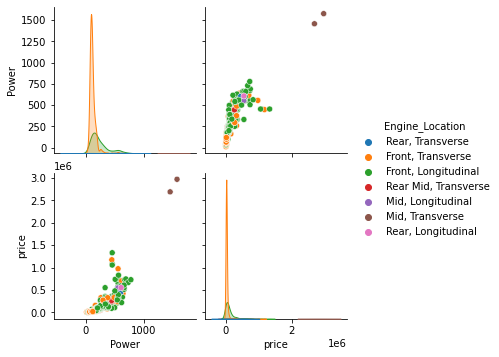

In [35]:
sns.pairplot(df,vars=['Power', 'price'], hue= 'Engine_Location')

<AxesSubplot:xlabel='price', ylabel='Engine_Location'>

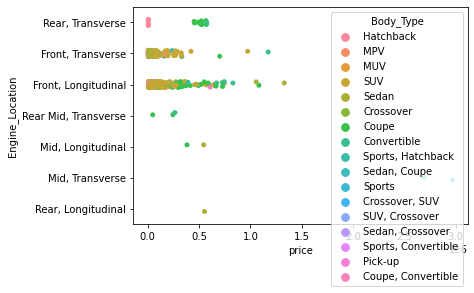

In [41]:
sns.stripplot(x='price' , y='Engine_Location' ,data=df, hue='Body_Type')

Most of the cars have Front Longitudedinal and Front Transverse as the engine location

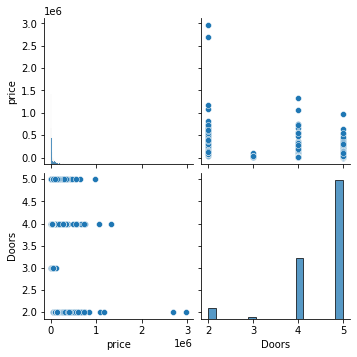

In [53]:
sns.pairplot(df,vars=['price','Doors'])

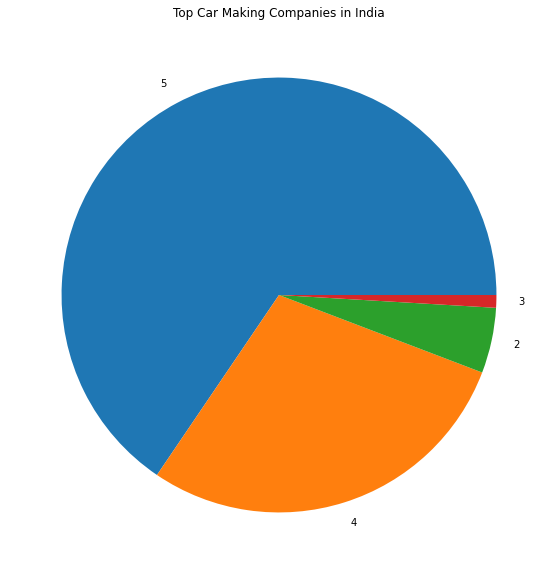

In [54]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Doors.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India")
plt.show()

It looks like Indian market lives more of a big sized cars 

Preferable warranty by indian market

Text(0.5, 1.0, 'Based on Warranty')

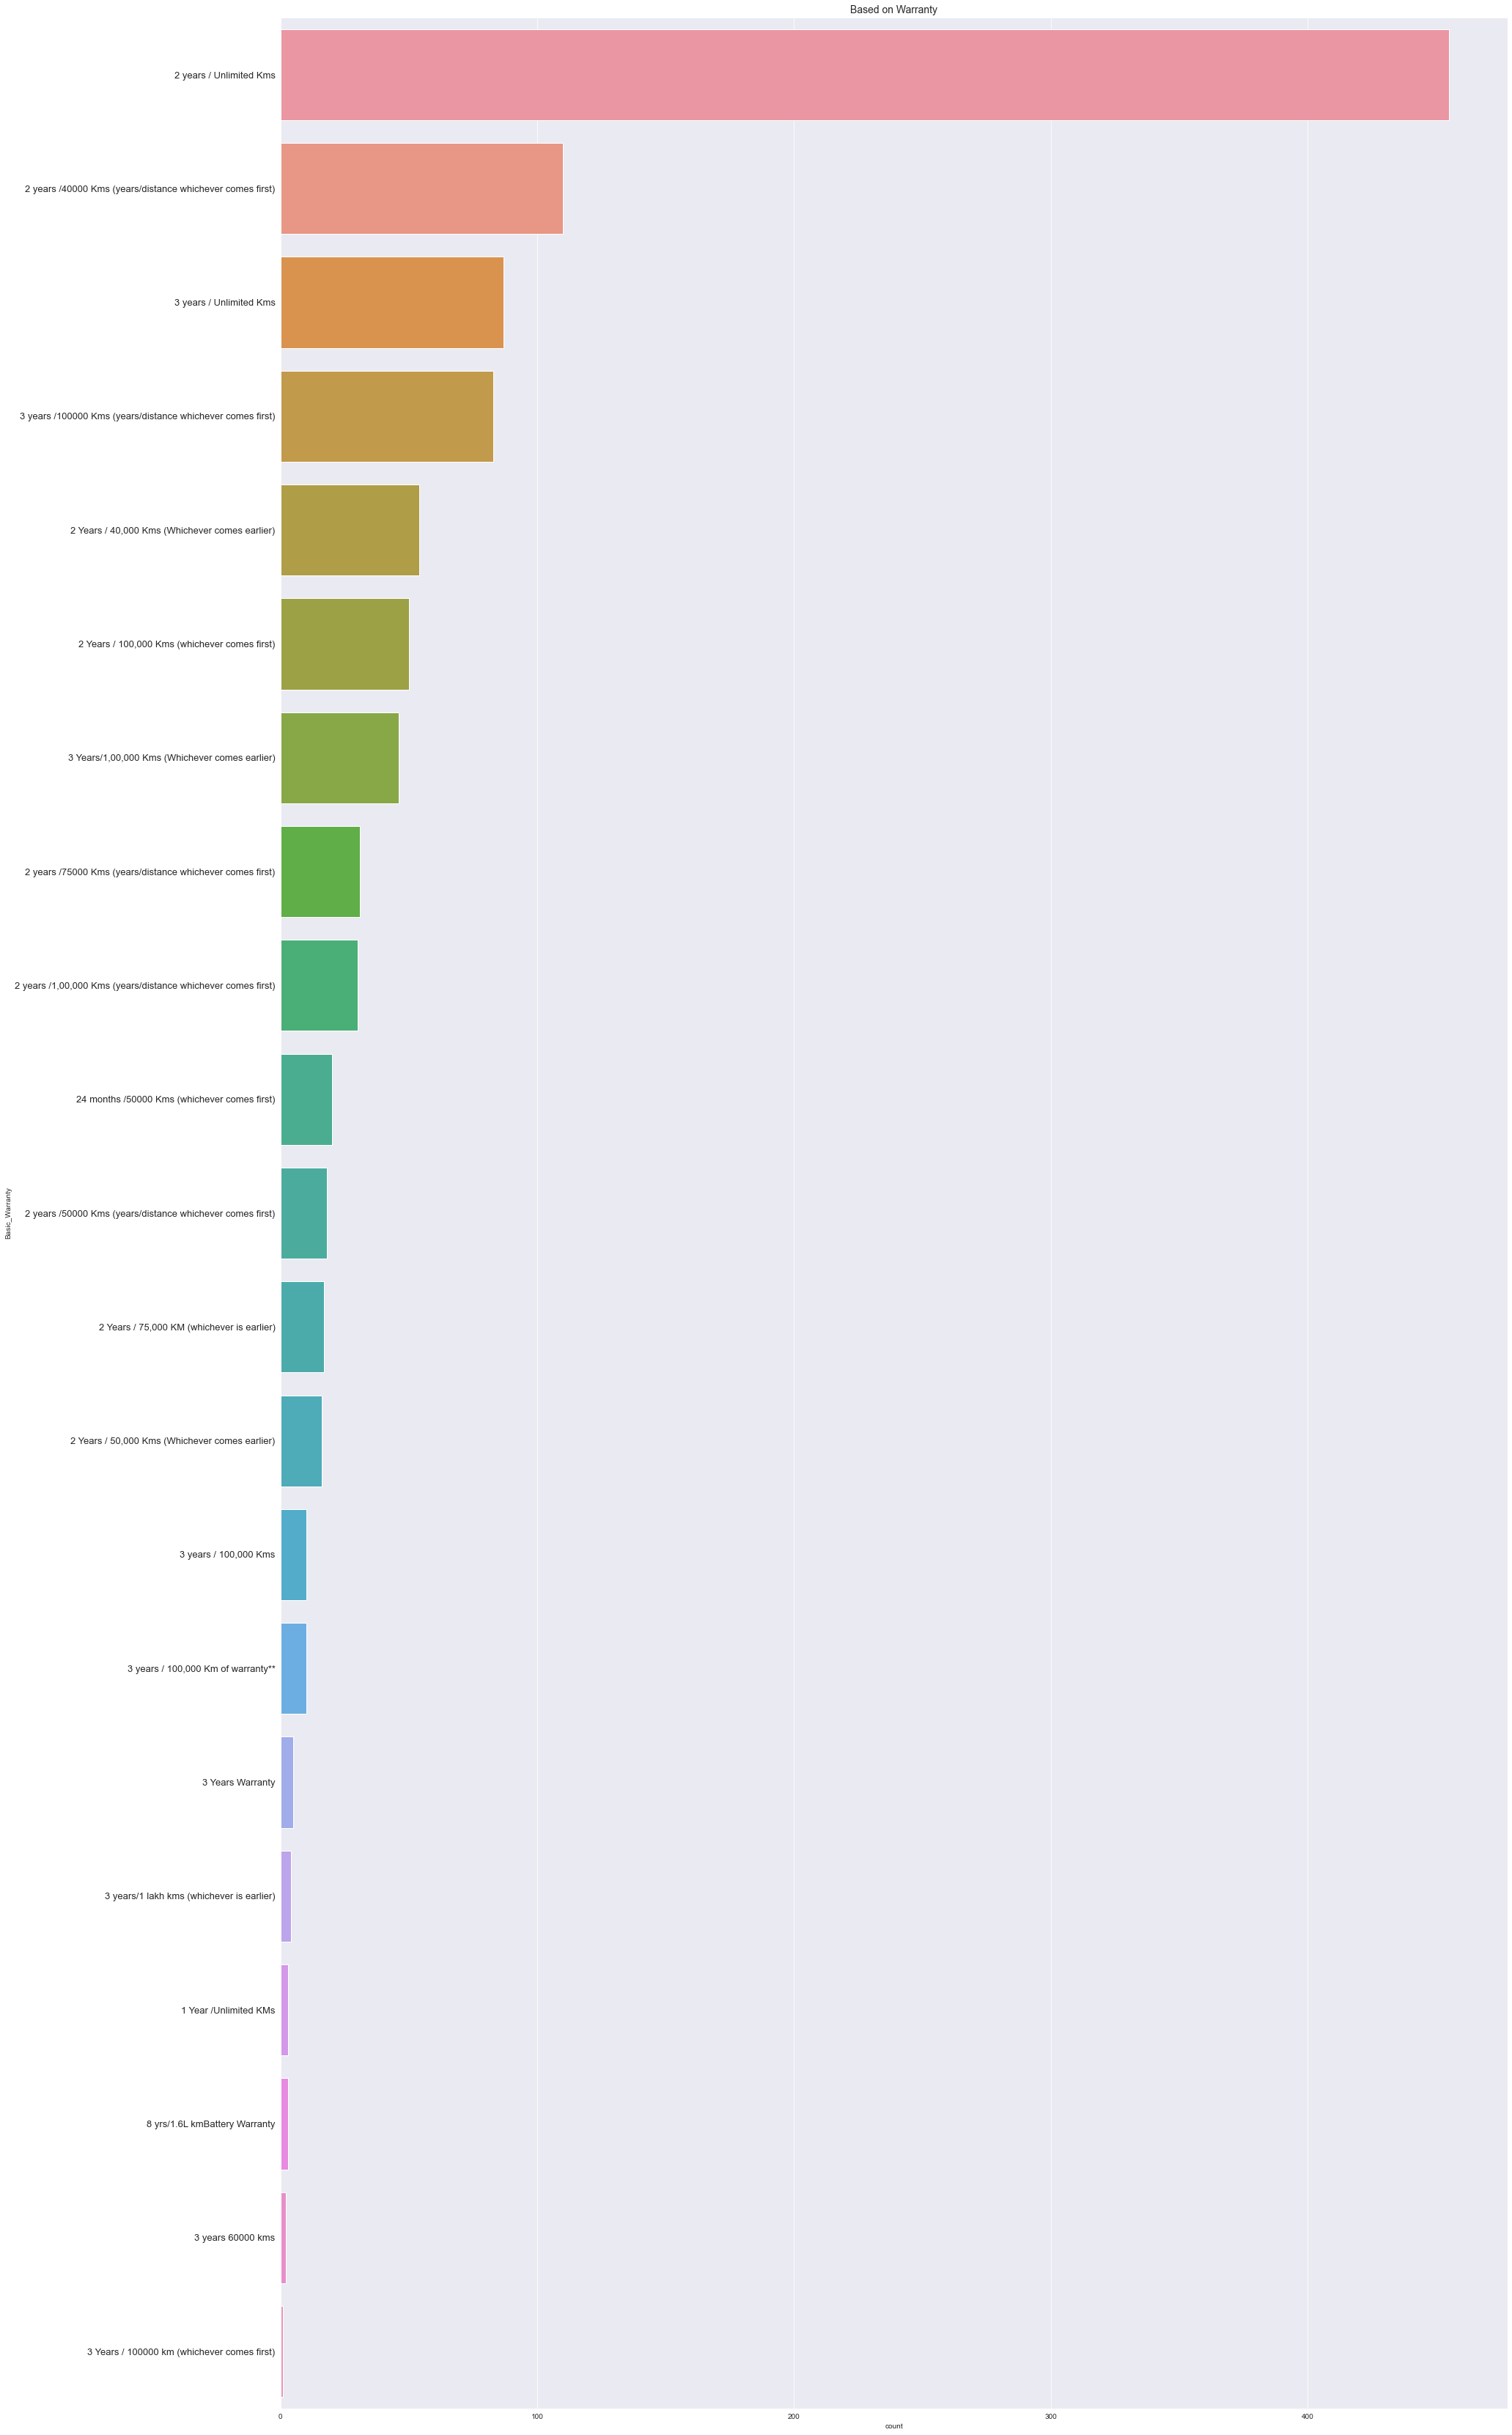

In [102]:
fig = plt.figure(figsize=(30,60))

ax21 = fig.add_subplot()

order = list(df.Make.value_counts().index)

o2 = list(df.Basic_Warranty.value_counts(ascending=False).index)
sns.countplot(data=df, y='Basic_Warranty', ax=ax21,order= o2)
ax21.yaxis.set_tick_params(rotation=0, labelsize=13)
ax21.set_title('Based on Warranty', fontsize=14)

### Engine performance

In [2]:
df = pd.read_csv('final_df3.csv')

**According to the above analysis, performance is a very hot topic with respect to price therefore all the features respect to engine performance is arranged in a subset.**

In [3]:
engine_df = df.drop_duplicates(subset=['ARAI_Certified_Mileage', 'Torque',  'price', 'Cylinders', 'Turbocharger', 'Displacement'])

In [4]:
engine_df1 = engine_df.groupby('Body_Type').mean()[['Power','price','ARAI_Certified_Mileage','Cylinders']].sort_values('Power',ascending=False).reset_index()

In [5]:
engine_df1

Body_Type        Power         price  ARAI_Certified_Mileage  \
0                Sports  1102.706667  1.970259e+06                6.600000   
1    Coupe, Convertible   659.850000  6.071450e+05                5.500000   
2                 Coupe   528.282927  4.019981e+05               44.544233   
3          Sedan, Coupe   473.925000  1.717380e+05               11.400000   
4           Convertible   408.731000  3.502848e+05                9.828678   
5   Sports, Convertible   264.830000  1.006600e+05                7.600000   
6     Sports, Hatchback   227.840000  6.090000e+04               16.470000   
7        Crossover, SUV   188.385000  5.145000e+04               18.490000   
8        SUV, Crossover   187.400000  5.950000e+04               20.680000   
9      Sedan, Crossover   187.400000  6.197100e+04               19.600000   
10                  SUV   170.191276  6.238849e+04               15.155000   
11                Sedan   144.375848  5.488819e+04               19.626547   
12              Pick-up   137.430000  2.548233e+04               10.300000   
13                  MUV   135.286757  2.662632e+04               13.638725   
14            Crossover    95.180556  1.140733e+04               21.836667   
15                  MPV    92.972632  1.854424e+04               17.333252   
16            Hatchback    78.957873  1.057423e+04               19.996725   

    Cylinders  
0   12.666667  
1    8.000000  
2    8.390244  
3    8.000000  
4    7.200000  
5    5.000000  
6    4.000000  
7    4.000000  
8    4.000000  
9    5.000000  
10   4.510251  
11   4.384848  
12   4.000000  
13   3.891892  
14   3.722222  
15   3.710526  
16   3.511111

**Since we can cleary see that engine performance is positive correlated with price and it also depends on body type.**

# Analysis based on New Technologies, Safety 

<AxesSubplot:xlabel='price', ylabel='Power_Steering'>

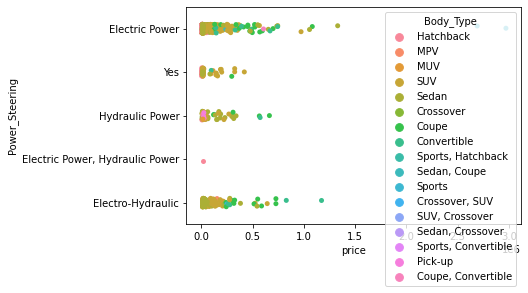

In [55]:
sns.stripplot(x='price' , y='Power_Steering' ,data=df, hue='Body_Type')

#### Most of the car in Indian market has power steering with electric and hydraulic power

<AxesSubplot:xlabel='price', ylabel='Power_Windows'>

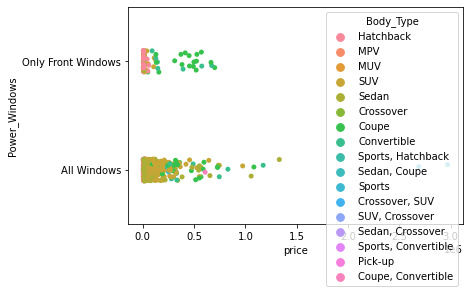

In [58]:
sns.stripplot(x='price' , y='Power_Windows' ,data=df, hue='Body_Type')

#### Most of the car in Indian market has Power windows in all the windows.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='price', ylabel='Power_Seats'>

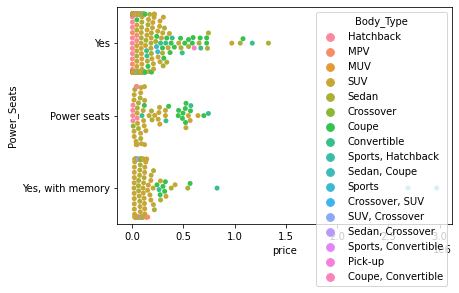

In [60]:
sns.swarmplot(x='price' , y='Power_Seats' ,data=df, hue='Body_Type')

<AxesSubplot:xlabel='price', ylabel='Keyless_Entry'>

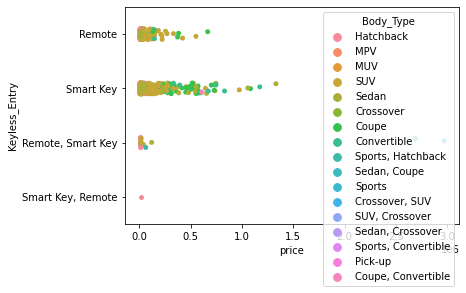

In [62]:
sns.stripplot(x='price' , y='Keyless_Entry' ,data=df, hue='Body_Type')

#### Most of the car in Indian market has smart key 

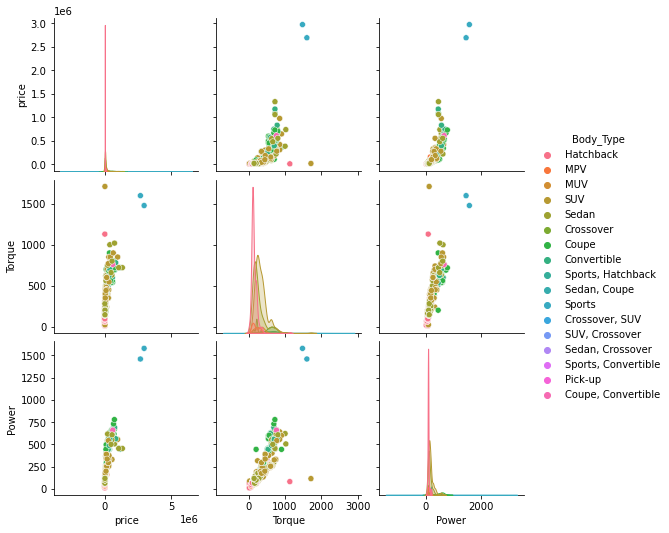

In [63]:
sns.pairplot(df,vars=['price','Torque', 'Power'],hue='Body_Type')

#### Most of the car in Indian market has Decent Torque and it positively effect the price since high torque gives good performence

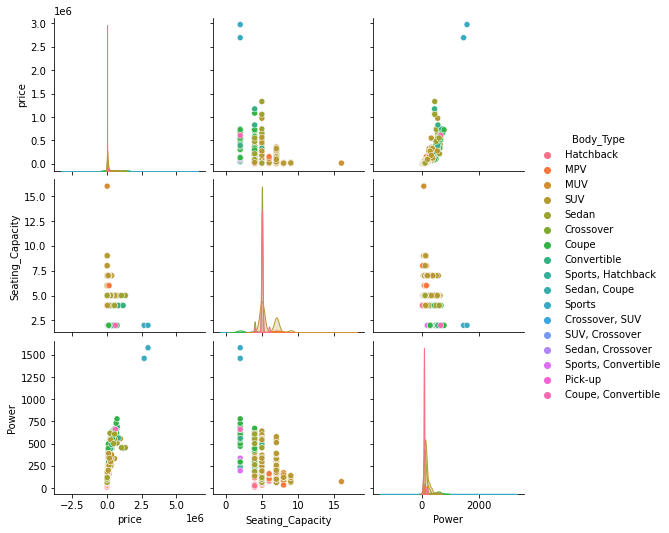

In [64]:
sns.pairplot(df,vars=['price','Seating_Capacity', 'Power'],hue='Body_Type')

#### Most of the car in Indian market has 4-10 seats therefore most of indian customers like family sized car or over sized car

<AxesSubplot:xlabel='price', ylabel='Seats_Material'>

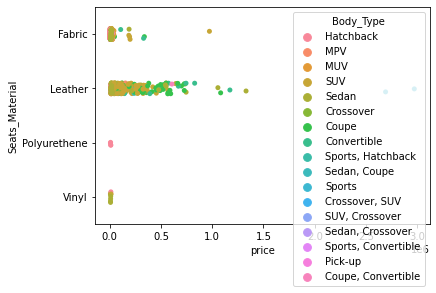

In [65]:
sns.stripplot(x='price' , y='Seats_Material' ,data=df, hue='Body_Type')

#### Most of the car in Indian market has Leather as their seat material therefore leather is a favourable seat material for indian market

<AxesSubplot:xlabel='price', ylabel='Type'>

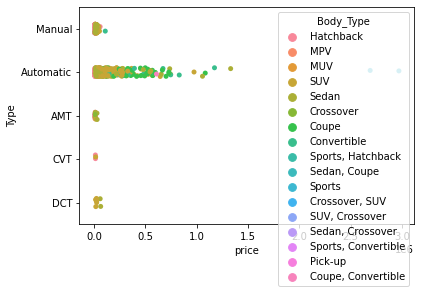

In [66]:
sns.stripplot(x='price' , y='Type' ,data=df, hue='Body_Type')

#### Most of the car in Indian market has automatic gear system which is obvious since worl is moving towards automationand easy to use technology

<AxesSubplot:xlabel='price', ylabel='Start_/_Stop_Button'>

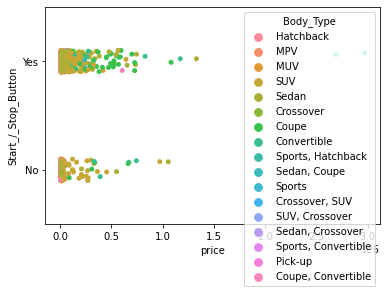

In [67]:
sns.stripplot(x='price' , y='Start_/_Stop_Button' ,data=df, hue='Body_Type')

<AxesSubplot:xlabel='price', ylabel='Audiosystem'>

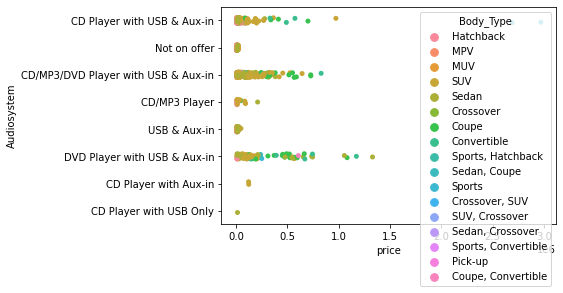

In [68]:
sns.stripplot(x='price' , y='Audiosystem' ,data=df, hue='Body_Type')

#### Indian Market do prefer audio system in their car.

<AxesSubplot:xlabel='price', ylabel='Bluetooth'>

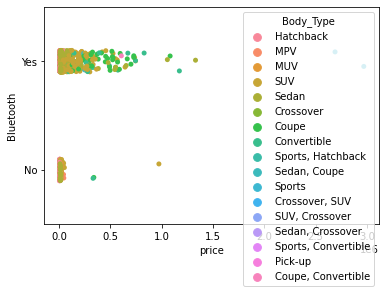

In [69]:
sns.stripplot(x='price' , y='Bluetooth' ,data=df, hue='Body_Type')

#### Most of the car in Indian market has Bluetooth which is obvious since their are many technologies which needs bluetooh to use for eg : airpods, bluetooth speakers etc.

<AxesSubplot:xlabel='price', ylabel='Boot-lid_Opener'>

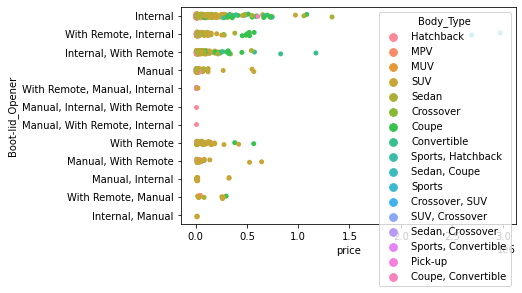

In [70]:
sns.stripplot(x='price' , y='Boot-lid_Opener' ,data=df, hue='Body_Type')

#### Most of the car in Indian market has Internal with remote 

In [89]:
df['Boot_Space'].head(20)
df['Boot_Space'] = df['Boot_Space'].str.replace('209(All3RowsUp).550(3rdRowFolded)&803(2ndRowand3rdRowFolded) ' , '375')
df['Boot_Space'].dtype

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12948/421222218.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



dtype('O')

<AxesSubplot:xlabel='price', ylabel='Central_Locking'>

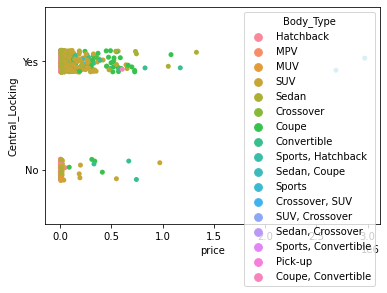

In [90]:
sns.stripplot(x='price' , y='Central_Locking' ,data=df, hue='Body_Type')

#### It is important feature for a safety since it manages to lock all the doors from the drivers seat and most of the cars have it.

<AxesSubplot:xlabel='price', ylabel='Child_Safety_Locks'>

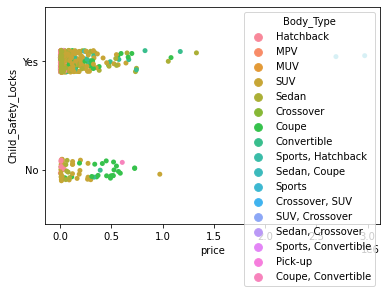

In [91]:
sns.stripplot(x='price' , y='Child_Safety_Locks' ,data=df, hue='Body_Type')

#### It is an importent feature which is becoming common in most of the cars to avoid accidents lead by children and most of the cars in indian market has it

<AxesSubplot:xlabel='price', ylabel='Distance_to_Empty'>

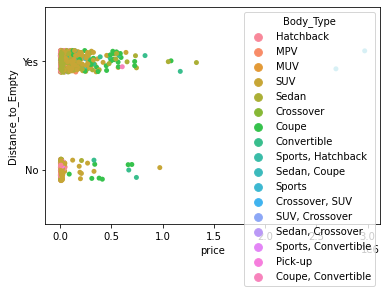

In [92]:
sns.stripplot(x='price' , y='Distance_to_Empty' ,data=df, hue='Body_Type')

#### It is a new technology which tells the driver about the distance they can travel on their current fuel availabity and most of the cars in the Indian market has it. 

<AxesSubplot:xlabel='price', ylabel='Sun_Visor'>

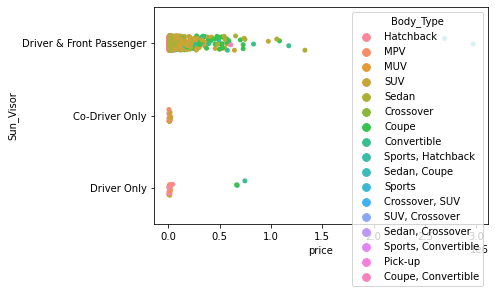

In [94]:
sns.stripplot(x='price' , y='Sun_Visor' ,data=df, hue='Body_Type')

#### It is an important feature which donot allow the light to strike the eye hence it avoid Light blinding while traveling and most of the cars in the Indian market has it

<AxesSubplot:xlabel='price', ylabel='Low_Fuel_Warning'>

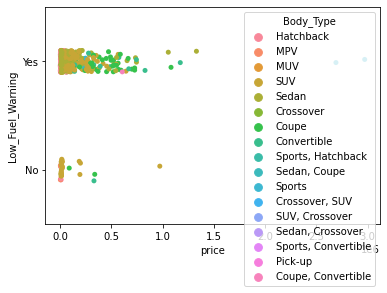

In [95]:
sns.stripplot(x='price' , y='Low_Fuel_Warning' ,data=df, hue='Body_Type')

#### It is a common technology which is present in most of the cars 

<AxesSubplot:xlabel='price', ylabel='Instrument_Console'>

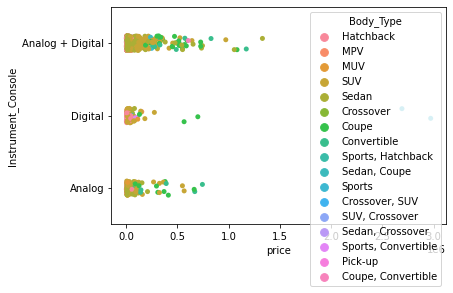

In [96]:
sns.stripplot(x='price' , y='Instrument_Console' ,data=df, hue='Body_Type')

<AxesSubplot:xlabel='price', ylabel='Multifunction_Display'>

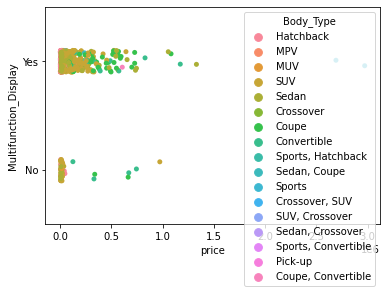

In [97]:
sns.stripplot(x='price' , y='Multifunction_Display' ,data=df, hue='Body_Type')

#### It is new technology and useful technology and present in most of the cars

<AxesSubplot:xlabel='price', ylabel='ABS_(Anti-lock_Braking_System)'>

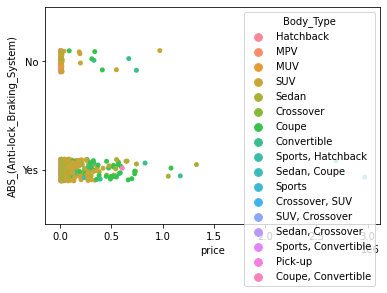

In [98]:
sns.stripplot(x='price' , y='ABS_(Anti-lock_Braking_System)' ,data=df, hue='Body_Type')

#### It is important safety feature help prevent car and motorcycle wheels locking up and improve steering control whilst braking and most of the car has it.

<AxesSubplot:xlabel='price', ylabel='Engine_Immobilizer'>

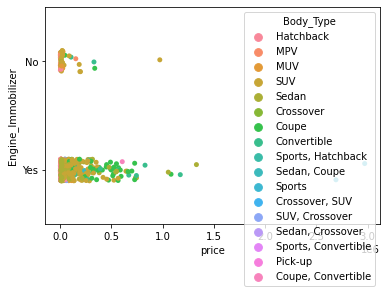

In [99]:
sns.stripplot(x='price' , y='Engine_Immobilizer' ,data=df, hue='Body_Type')

#### It is an imortant theft protection technology.It is an electronic security device fitted to a motor vehicle that prevents the engine from being started unless the correct key (transponder or smart key) is present. Most of the cars in Indian market has it.

<AxesSubplot:xlabel='price', ylabel='Paddle_Shifters'>

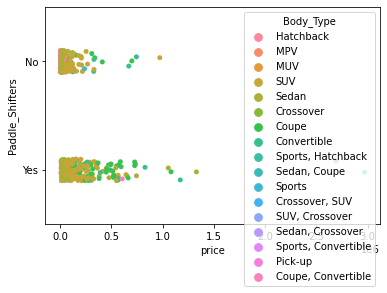

In [100]:
sns.stripplot(x='price' , y='Paddle_Shifters' ,data=df, hue='Body_Type')

#### It is an new and expensive technology which allow you to shift gear while holding the steering wheel without having to move your hand to the gear lever. Most of the car prefer new technology and most of them has it

<AxesSubplot:xlabel='price', ylabel='ISOFIX_(Child-Seat_Mount)'>

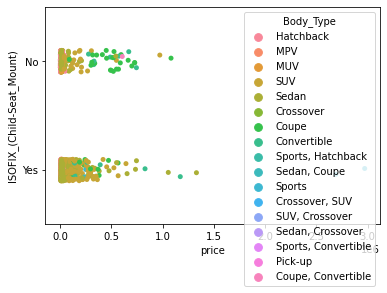

In [101]:
sns.stripplot(x='price' , y='ISOFIX_(Child-Seat_Mount)' ,data=df, hue='Body_Type')

#### It is family feature. It is an extra seat for small children and it is present in most of the cars hence it tells ius that most of the car buyers are buying family cars


<AxesSubplot:xlabel='price', ylabel='Turbocharger'>

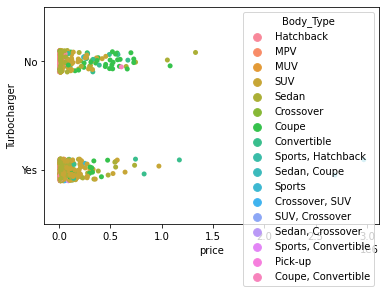

In [102]:
sns.stripplot(x='price' , y='Turbocharger' ,data=df, hue='Body_Type')

#### A turbocharger is a device fitted to a vehicle's engine that is designed to improve the overall efficiency and increase performance. Since there are more number of cars with turbocharger hence indian market loves good performence of the car.

<AxesSubplot:xlabel='price', ylabel='ESP_(Electronic_Stability_Program)'>

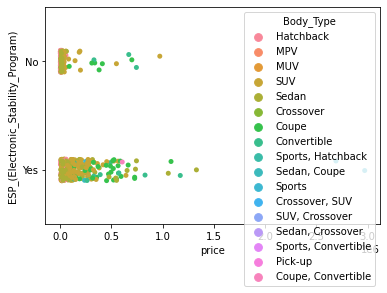

In [103]:
sns.stripplot(x='price' , y='ESP_(Electronic_Stability_Program)' ,data=df, hue='Body_Type')

#### It is a new Technology which supports the driver in nearly all critical driving situations.It is presnt in most of the cars.

<AxesSubplot:xlabel='price', ylabel='EBA_(Electronic_Brake_Assist)'>

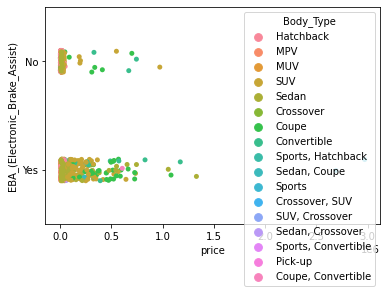

In [104]:
sns.stripplot(x='price' , y='EBA_(Electronic_Brake_Assist)' ,data=df, hue='Body_Type')

#### It is a new technology. It is a Brake Assist System senses the force at which you brake to determine where you need full braking power..It is presnt in most of the cars.

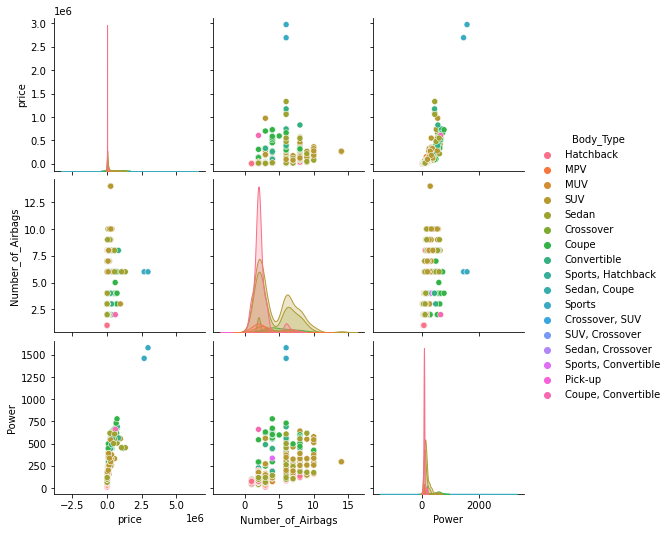

In [105]:
sns.pairplot(df,vars=['price','Number_of_Airbags', 'Power'],hue='Body_Type')

<AxesSubplot:xlabel='Number_of_Airbags', ylabel='price'>

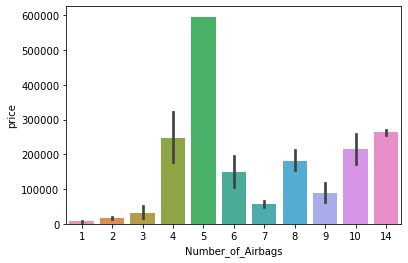

In [110]:
sns.barplot(x='Number_of_Airbags',y='price',data=df)

#### It is the most important feature for a car. And Indian market has decent amout of it 

<AxesSubplot:xlabel='price', ylabel='Fasten_Seat_Belt_Warning'>

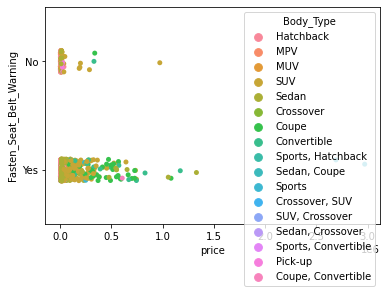

In [111]:
sns.stripplot(x='price' , y='Fasten_Seat_Belt_Warning' ,data=df, hue='Body_Type')

<AxesSubplot:xlabel='price', ylabel='EBD_(Electronic_Brake-force_Distribution)'>

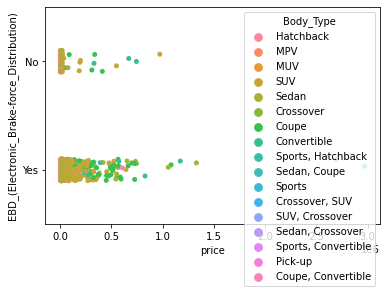

In [112]:
sns.stripplot(x='price' , y='EBD_(Electronic_Brake-force_Distribution)' ,data=df, hue='Body_Type')

#### It is an automobile brake technology that automatically varies the amount of force applied to each of a vehicle's wheels, based on road conditions, speed, loading, etc, thus providing intelligent control of both brake balance. Most of the cars has it.

In [105]:
df['Boot_Space'] = df['Boot_Space'].replace(to_replace='209(All3RowsUp).550(3rdRowFolded)&803(2ndRowand3rdRowFolded) ' , value=350)
df[['Boot_Space']] = df[['Boot_Space']].astype(float)

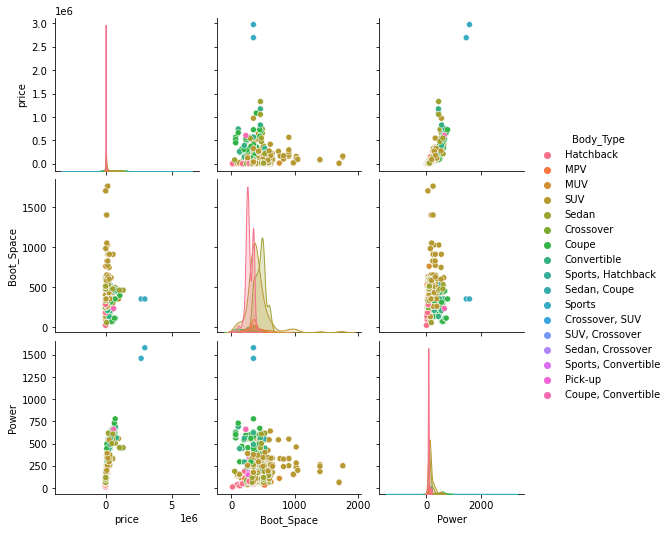

In [6]:
sns.pairplot(df,vars=['price','Boot_Space', 'Power'],hue='Body_Type')

#### Most of the boots are of the size upto 1000mm which is better since you can carry many stuff from one place to another and most of the cars in indian market are hatchbacks and suv which has bigger boots hence it is obvious

<AxesSubplot:xlabel='price', ylabel='Door_Ajar_Warning'>

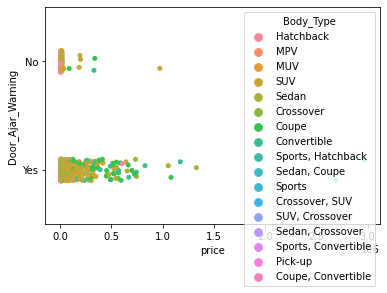

In [113]:
sns.stripplot(x='price' , y='Door_Ajar_Warning' ,data=df, hue='Body_Type')

#### It is a common feature now-a-days hence it is present in most of the car


<AxesSubplot:xlabel='price', ylabel='Auto-Dimming_Rear-View_Mirror'>

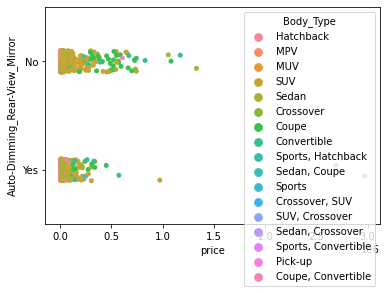

In [114]:
sns.stripplot(x='price' , y='Auto-Dimming_Rear-View_Mirror' ,data=df, hue='Body_Type')

#### It is an safety feature which offers greater safety when driving at night, as it stops you from being dazzled by traffic travelling behind.Most of the car doesnt have it.

# Visualization and dashboard on Tableau based on bellow topics

- [Engine Performance](https://public.tableau.com/app/profile/shankhadeep.sarkar7325/viz/CarEnginePerformance/Engineperformence)
- [Body Type](https://public.tableau.com/app/profile/shankhadeep.sarkar7325/viz/Caranalysisbasedonbodytype/BasedonbodyType)
- [Safety](https://public.tableau.com/app/profile/shankhadeep.sarkar7325/viz/Caranalysisbasedonsafety/basedonSafety)
- [Fuel](https://public.tableau.com/app/profile/shankhadeep.sarkar7325/viz/CaranalysisbasedonFuel/basedonFuel)
- [New Technology](https://public.tableau.com/app/profile/shankhadeep.sarkar7325/viz/CaranalysisbasedonnewTechnology/NewTechnology)
- [Family Car](https://public.tableau.com/app/profile/shankhadeep.sarkar7325/viz/Caranalysisbasedonfamilycaranalysis/basedonfamilycaranalysis)

**Please Visualize It in "Full Screen"**

# Summary of EDA

**After having exploratory data analysis and visualizing with the help of Tableau I came to this conclusion. Indian Market has many varients of cars with different type of body type and different features.The Top 5 companies with more than car variants in India are Maruti Suzuki, Hyundai, Mahindra, Tata, and Toyota. Though we can say that most favourable body type in indian market is Hatchbacks and SUV. Most of the cars are having petrol and diesel as their fuel type. Power is an importent feature price increase with the power but mileage decrease whith increasing power.Torque is directly propostional to power hence it is also propostion to price.From the above data we also get to know that cars in Indian market has decent horsepower. Indian market loves car with decent values of power and performence of the engine. Ex-Showroom price is positively correlated to Displacement.Ex-Showroom Price is Positively Correlated to the number of Cylinders. This means, more the number of cylinders, more the ex-showroom price.The more the number of cylinders in a car, the more will be its displacement. Generally speaking, the higher an engine’s displacement the more power it can create.The number of doors is highly negatively correlated with Displacement. That makes sense, right since sports car has less number of doors and its mileage is very less and the power is very high including price. Now lets look into features like new technologies and safety and other features. Indian market is catching up to most of new technology. Most of the cars are having power steering with electric or hydraulic power.Almost all cars have power window. Keyless entry is also present in most of the cars.Indian also prefer audio system and bluetooth in their car Most of the cars have 4-10 number of seats which means Indian buyer loves big cars which makes sense since most favourables cars in indian market are SUV and Hatchbacks. Buyers do like leather as their seat fabric. Most of the cars are automatic and hence tells us that Indian market is moving towards automation. Indain market has also uses advanced feature for brake system, theft proof system , Multifunction Display etc. For aadvanced brake system:-EBA_(Electronic_Brake_Assist),EBD_(Electronic_Brake-force_Distribution) these technologies are present in most of the cars which is also good for safety purpose. But on the same hand It is does not have ESP,EBA which is also new technologies hence we can say Indian market has decsnt or average amount of cars with new technology. For theft system:- most of the cars are having Engine Immobilizer which only activates engine if the correct key is being inserted.We can say that half of the Indian buyers are having family since 40 % of indian buyers are having ISOFIX_(Child-Seat_Mount) feature which is an extra seat attached on the back seat for kids and having Child Safety Locks. In the field of safety most of the cars has decent or average safety since Indian buyers are fond of budget cars and hence most of the cars has 1 air bag and cars with 5 airbags are less in numbers which has high price.**  

# Why to perform Clustering Analysis?
**Clustering Analysis is the main part of customer segmentation.Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data analysis, and a common technique for statistical data analysis.It's now clear that we have to look to many dimensions in order to cluster the market, as the more features we explore the harder it's to cluster the market. These dimensions affect the decision of the buyers not to mention it also precvied totally different due to the very different mental models of buyers, in other words, price horsepower and mileage are not everything, some buyers would like to have a long wheel base car, some would like to have wider car all of the previous features, and more, strongly affect the buyer' decisions.**

![Cluster image](cl.png)

# Performing more feature engineering, cleaning and manipulating data for Cluster Analysis

In [115]:
df.to_csv("final_df1.csv" , index=False)

In [3]:
df = pd.read_csv('final_df1.csv')
df.head(5)

Unnamed: 0  Make      Model  Variant  Displacement  Cylinders  \
0           0  Tata  Nano Genx       Xt           624          2   
1           1  Tata  Nano Genx       Xe           624          2   
2           2  Tata  Nano Genx  Emax Xm           624          2   
3           3  Tata  Nano Genx      Xta           624          2   
4           4  Tata  Nano Genx       Xm           624          2   

   Valves_Per_Cylinder              Drivetrain Cylinder_Configuration  \
0                  2.0  RWD (Rear Wheel Drive)                In-line   
1                  2.0  RWD (Rear Wheel Drive)                In-line   
2                  2.0  RWD (Rear Wheel Drive)                In-line   
3                  2.0  RWD (Rear Wheel Drive)                In-line   
4                  2.0  RWD (Rear Wheel Drive)                In-line   

  Emission_Norm  ... Seat_Height_Adjustment Navigation_System  \
0         BS IV  ...      Manual Adjustment                No   
1         BS IV  ...      Manual Adjustment                No   
2         BS IV  ...      Manual Adjustment                No   
3         BS IV  ...      Manual Adjustment                No   
4         BS IV  ...      Manual Adjustment                No   

   Second_Row_AC_Vents ESP_(Electronic_Stability_Program) Turbocharger  \
0                   No                                 No           No   
1                   No                                 No           No   
2                   No                                 No           No   
3                   No                                 No           No   
4                   No                                 No           No   

   ISOFIX_(Child-Seat_Mount)  Rain_Sensing_Wipers Paddle_Shifters  \
0                         No                   No              No   
1                         No                   No              No   
2                         No                   No              No   
3                         No                   No              No   
4                         No                   No              No   

  Leather_Wrapped_Steering  price  
0                       No   4097  
1                       No   3310  
2                       No   4153  
3                       No   4686  
4                       No   3811  

[5 rows x 81 columns]

#### Feature engineering for accurate result from the clustering analysis

In [4]:
df['Parking_Assistance'] = df['Parking_Assistance'].replace(to_replace='No' , value='No_Parking_Assistance')
df['Infotainment_Screen'] = df['Infotainment_Screen'].replace(to_replace='No' , value='No_Infotainment_Screen')
df['Infotainment_Screen'] = df['Infotainment_Screen'].replace(to_replace='Touch Sensitive' , value='Touch Sensitive_Parking_Assistance')

In [22]:
df['Auto-Dimming_Rear-View_Mirror'] = df['Auto-Dimming_Rear-View_Mirror'].replace(to_replace='Yes' , value=1)
df['Auto-Dimming_Rear-View_Mirror'] = df['Auto-Dimming_Rear-View_Mirror'].replace(to_replace='No' , value='0')

In [41]:
df['Leather_Wrapped_Steering'] = df['Leather_Wrapped_Steering'].replace(to_replace='Yes' , value=1)
df['Leather_Wrapped_Steering'] = df['Leather_Wrapped_Steering'].replace(to_replace='No' , value='0')

In [72]:

df['Multifunction_Steering_Wheel'] = df['Multifunction_Steering_Wheel'].replace(to_replace='With gear shift paddles' , value='Yes')
df['Multifunction_Steering_Wheel'] = df['Multifunction_Steering_Wheel'].replace(to_replace='Yes' , value=1)
df[['Multifunction_Steering_Wheel']] = df[['Multifunction_Steering_Wheel']].astype(int)

In [80]:
df[['Leather_Wrapped_Steering']] = df[['Leather_Wrapped_Steering']].astype(int)

In [81]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']

In [96]:
num_cols = [ i for i in df.columns if df[i].dtype != 'int']

In [97]:
pd.DataFrame(num_cols)

0
0                       Unnamed: 0
1                             Make
2                            Model
3                          Variant
4                     Displacement
5                        Cylinders
6              Valves_Per_Cylinder
7                       Drivetrain
8           Cylinder_Configuration
9                    Emission_Norm
10                 Engine_Location
11                     Fuel_System
12              Fuel_Tank_Capacity
13                       Fuel_Type
14                       Body_Type
15                           Doors
16          ARAI_Certified_Mileage
17  ARAI_Certified_Mileage_for_CNG
18                           Gears
19                Ground_Clearance
20                    Front_Brakes
21                     Rear_Brakes
22                Front_Suspension
23                 Rear_Suspension
24                      Rear_Track
25                  Power_Steering
26                   Power_Windows
27                     Power_Seats
28                   Keyless_Entry
29                           Power
30                          Torque
31                Seating_Capacity
32                  Seats_Material
33                            Type
34                     Audiosystem
35                  Basic_Warranty
36                 Boot-lid_Opener
37                      Boot_Space
38                    Door_Pockets
39               Extended_Warranty
40                 Fuel-lid_Opener
41                      Fuel_Gauge
42                       Handbrake
43              Instrument_Console
44                       Sun_Visor
45              Third_Row_AC_Vents
46                         Airbags
47               Number_of_Airbags
48              Parking_Assistance
49             Infotainment_Screen
50          Seat_Height_Adjustment
51                 Paddle_Shifters
52                           price

In [100]:
df['Gears'].isnull().sum()

0

In [99]:
df['Gears'] = df['Gears'].fillna(df['Gears'].mode()[0])

In [103]:
df['Gears'] = df['Gears'].replace(to_replace='Single Speed Reduction Gear' , value=2)
df[['Gears']] = df[['Gears']].astype(int)

In [109]:
df['Boot-lid_Opener'] = df['Boot-lid_Opener'].replace(to_replace='Internal' , value='Internal_Boot_lid')
df['Boot-lid_Opener'] = df['Boot-lid_Opener'].replace(to_replace='With Remote, Internal' , value='Remote_Internal_Boot_lid')
df['Boot-lid_Opener']

0              Internal_Boot_lid
1              Internal_Boot_lid
2              Internal_Boot_lid
3              Internal_Boot_lid
4              Internal_Boot_lid
                  ...           
1271    Remote_Internal_Boot_lid
1272    Remote_Internal_Boot_lid
1273    Remote_Internal_Boot_lid
1274           Internal_Boot_lid
1275           Internal_Boot_lid
Name: Boot-lid_Opener, Length: 1276, dtype: object

In [34]:
df = pd.read_csv('final_df2.csv')
df

Unnamed: 0        Make      Model        Variant  Displacement  \
0              0        Tata  Nano Genx             Xt           624   
1              1        Tata  Nano Genx             Xe           624   
2              2        Tata  Nano Genx        Emax Xm           624   
3              3        Tata  Nano Genx            Xta           624   
4              4        Tata  Nano Genx             Xm           624   
...          ...         ...        ...            ...           ...   
1271        1271       Honda       City   Vx Mt Diesel          1498   
1272        1272       Honda       City   Zx Mt Diesel          1498   
1273        1273       Honda       City  Zx Cvt Petrol          1497   
1274        1274       Honda       City   V Cvt Petrol          1497   
1275        1275  Mitsubishi    Montero         3.2 At          3200   

      Cylinders  Valves_Per_Cylinder               Drivetrain  \
0             2                  2.0   RWD (Rear Wheel Drive)   
1             2                  2.0   RWD (Rear Wheel Drive)   
2             2                  2.0   RWD (Rear Wheel Drive)   
3             2                  2.0   RWD (Rear Wheel Drive)   
4             2                  2.0   RWD (Rear Wheel Drive)   
...         ...                  ...                      ...   
1271          4                  4.0  FWD (Front Wheel Drive)   
1272          4                  4.0  FWD (Front Wheel Drive)   
1273          4                  4.0  FWD (Front Wheel Drive)   
1274          4                  4.0  FWD (Front Wheel Drive)   
1275          4                  4.0    AWD (All Wheel Drive)   

     Cylinder_Configuration Emission_Norm      Engine_Location Fuel_System  \
0                   In-line         BS IV     Rear, Transverse   Injection   
1                   In-line         BS IV     Rear, Transverse   Injection   
2                   In-line         BS IV     Rear, Transverse   Injection   
3                   In-line         BS IV     Rear, Transverse   Injection   
4                   In-line         BS IV     Rear, Transverse   Injection   
...                     ...           ...                  ...         ...   
1271                In-line         BS IV    Front, Transverse   Injection   
1272                In-line         BS IV    Front, Transverse   Injection   
1273                In-line          BS 6    Front, Transverse   Injection   
1274                In-line          BS 6    Front, Transverse   Injection   
1275                In-line         BS IV  Front, Longitudinal   Injection   

      Fuel_Tank_Capacity Fuel_Type  Body_Type  Doors  ARAI_Certified_Mileage  \
0                   24.0    Petrol  Hatchback      5               23.600000   
1                   24.0    Petrol  Hatchback      5               23.600000   
2                   15.0       CNG  Hatchback      4                3.977853   
3                   24.0    Petrol  Hatchback      5               21.900000   
4                   24.0    Petrol  Hatchback      5               23.600000   
...                  ...       ...        ...    ...                     ...   
1271                40.0    Diesel      Sedan      4               25.100000   
1272                40.0    Diesel      Sedan      4               25.100000   
1273                40.0    Petrol      Sedan      4               22.600000   
1274                40.0    Petrol      Sedan      4               17.800000   
1275                88.0    Diesel        SUV      5               11.560000   

     ARAI_Certified_Mileage_for_CNG  Gears  Ground_Clearance  ...  \
0                               NaN      4             180.0  ...   
1                               NaN      4             180.0  ...   
2                          36 km/kg      4             180.0  ...   
3                               NaN      5             180.0  ...   
4                               NaN      4             180.0  ...   
...                             ...    ...      

In [35]:
df.drop(['Door_Pockets'], axis=1, inplace=True)

In [36]:
df['Power_Steering'] = df['Power_Steering'].replace(to_replace='Electric Power' , value='Electric_Power_Steering')
df['Power_Steering'] = df['Power_Steering'].replace(to_replace='Yes' , value='Electric_Power_Steering')
df['Power_Steering'] = df['Power_Steering'].replace(to_replace='Hydraulic Power' , value='Hydraulic_Power_Steering')
df['Power_Steering'] = df['Power_Steering'].replace(to_replace='Both_Power_Steering' , value='Electro_Hydraulic_Steering')
df['Power_Steering'] = df['Power_Steering'].replace(to_replace='Electro-Hydraulic' , value='Electro_Hydraulic_Steering')


In [37]:
df['Power_Windows'] = df['Power_Windows'].replace(to_replace='All Windows' , value='All_Power_Windows')
df['Power_Windows'] = df['Power_Windows'].replace(to_replace='Only Front Windows' , value='Front_Power_Windows')

In [38]:
df['Sun_Visor'] = df['Sun_Visor'].replace(to_replace='Driver & Front Passenger' , value='Driver_Front_sun_Visor')
df['Sun_Visor'] = df['Sun_Visor'].replace(to_replace='Co-Driver Only' , value='Co_Driver_sun_Visor')

In [3]:
df = pd.read_csv('final_df3.csv')

#### Checking the price range

In [4]:
price_till_80 = df.price[(df.price >=3310) & (df.price <= 80000 )]
price_above_80 = df.price[(df.price >=80000) & (df.price <= 2970175 )]

<function matplotlib.pyplot.show(close=None, block=None)>

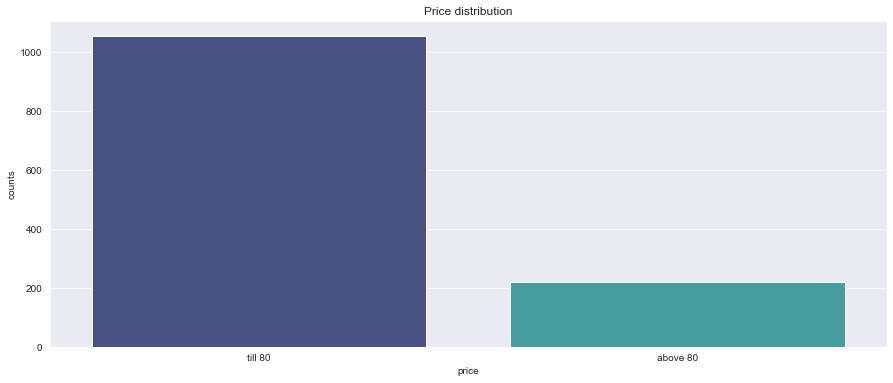

In [5]:
x=['till 80' , 'above 80']
y=[len(price_till_80) , len(price_above_80)]

plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y,palette='mako')
plt.title('Price distribution')
plt.xlabel('price')
plt.ylabel('counts')
plt.show

In [6]:
df = df[df.price < 80000]

In [7]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']
X1 = df.loc[:,['Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Fuel_Tank_Capacity', 'Doors', 'ARAI_Certified_Mileage', 'Gears', 'Ground_Clearance', 'Power', 'Torque', 'Seating_Capacity', 'Start_/_Stop_Button', 'Bluetooth', 'Boot_Space', 'Central_Locking', 'Child_Safety_Locks', 'Distance_to_Empty', 'Engine_Malfunction_Light', 'FM_Radio', 'Low_Fuel_Warning', 'Multifunction_Display', 'Auto-Dimming_Rear-View_Mirror', 'Gear_Indicator', 'Engine_Immobilizer', 'Seat_Back_Pockets', 'ABS_(Anti-lock_Braking_System)', 'Door_Ajar_Warning', 'EBD_(Electronic_Brake-force_Distribution)', 'Fasten_Seat_Belt_Warning', 'Gear_Shift_Reminder', 'Number_of_Airbags', 'Key_Off_Reminder', 'Multifunction_Steering_Wheel', 'EBA_(Electronic_Brake_Assist)', 'Navigation_System', 'ESP_(Electronic_Stability_Program)', 'Turbocharger', 'ISOFIX_(Child-Seat_Mount)', 'Rain_Sensing_Wipers', 'Paddle_Shifters', 'Leather_Wrapped_Steering', 'price']].values
wcss=[]



 #### A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. **The Elbow Method** is one of the most popular methods to determine this optimal value of k.

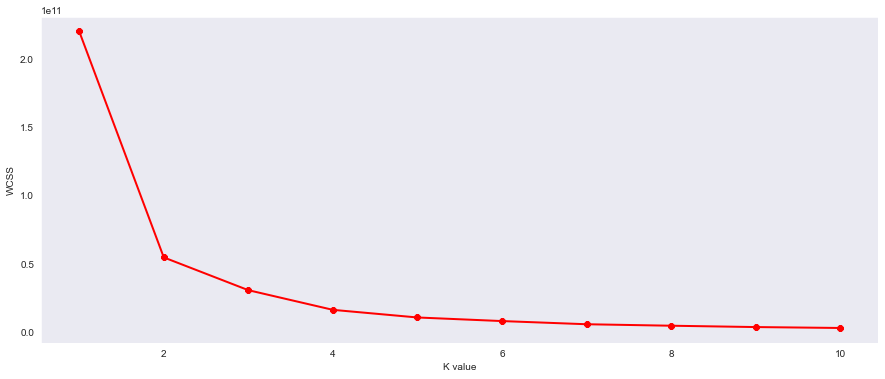

In [8]:
#performing Elbow Method
for k in range(1,11):
    kmeans = KMeans(n_clusters=k , init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2 , color = "red", marker="8")
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

**Got the value of 4 therefore no of cluster should be 4**

**Fitting K-means clustering model with 10 clusters and adding a cluster column to the dataset**

In [9]:
km = KMeans(n_clusters=4, n_init=20, max_iter=400, random_state=0)
clusters = km.fit_predict(df[num_cols])
df['cluster'] = clusters
df.cluster = (df.cluster + 1).astype('object')
df.sample(5)

Unnamed: 0           Make      Model                  Variant  \
1089        1089  Maruti Suzuki       Ciaz  1.3L Alpha Smart Hybrid   
1187        1187           Tata  Tiago Nrg            1.2L Revotron   
939          939  Maruti Suzuki  Baleno Rs                   Rs 1.0   
1111        1111          Skoda      Rapid            1.6 Mpi Style   
1091        1091  Maruti Suzuki       Ciaz  1.3L Delta Smart Hybrid   

      Displacement  Cylinders  Valves_Per_Cylinder               Drivetrain  \
1089          1248          4                  4.0  FWD (Front Wheel Drive)   
1187          1199          3                  4.0  FWD (Front Wheel Drive)   
939            998          3                  4.0  FWD (Front Wheel Drive)   
1111          1598          4                  4.0  FWD (Front Wheel Drive)   
1091          1248          4                  4.0  FWD (Front Wheel Drive)   

        Engine_Location Fuel_System  Fuel_Tank_Capacity Fuel_Type  Body_Type  \
1089  Front, Transverse   Injection                43.0    Diesel      Sedan   
1187  Front, Transverse   Injection                35.0    Petrol  Crossover   
939   Front, Transverse   Injection                37.0    Petrol  Hatchback   
1111  Front, Transverse   Injection                55.0    Petrol      Sedan   
1091  Front, Transverse   Injection                43.0    Diesel      Sedan   

      Doors  ARAI_Certified_Mileage ARAI_Certified_Mileage_for_CNG  Gears  \
1089      4                   28.09                            NaN      5   
1187      5                   23.84                            NaN      5   
939       5                   21.40                            NaN      5   
1111      4                   15.41                            NaN      5   
1091      4                   28.09                            NaN      5   

      Ground_Clearance     Front_Brakes      Rear_Brakes  ...  \
1089             170.0  Ventilated Disc             Drum  ...   
1187             180.0  Ventilated Disc             Drum  ...   
939              170.0  Ventilated Disc  Ventilated Disc  ...   
1111             163.0  Ventilated Disc             Drum  ...   
1091             170.0  Ventilated Disc             Drum  ...   

     EBD_(Electronic_Brake-force_Distribution) Fasten_Seat_Belt_Warning  \
1089                                         1                        1   
1187                                         1                        1   
939                                          1                        1   
1111                                         0                        1   
1091                                         1                        1   

     Gear_Shift_Reminder Number_of_Airbags  \
1089                   1                 2   
1187                   1                 2   
939                    0                 2   
1111                   0                 2   
1091                   1                 2   

                      Parking_Assistance Key_Off_Reminder  \
1089            Rear sensors with camera                1   
1187  Front and rear sensors with camera                1   
939             Rear sensors with camera                1   
1111                        Rear sensors                1   
1091                        Rear sensors                0   

                     Infotainment_Screen  Multifunction_Steering_Wheel  \
1089  Touch Sensitive_Parking_Assistance                             1   
1187  Touch Sensitive_Parking_Assistance                             1   
939   Touch Sensitive_Parking_Assistance                             1   
1111                                 Yes                             1   
1091              No_Infotainment_Screen                             1   

      EBA_(Electronic_Brake_Assist)  Seat_Height_Adjustment Navigation_System  \
1089                              0       Manual Adjustment                 1   
1187                              0       Manual Adjustment        

In [10]:
df.to_csv('df_cluster.csv',index=False)

In [15]:
import pickle
pickle.dump(km,open('modelc.pkl','wb'))

**Now we check some scatter plots but with adding cluster**

Price vs Power

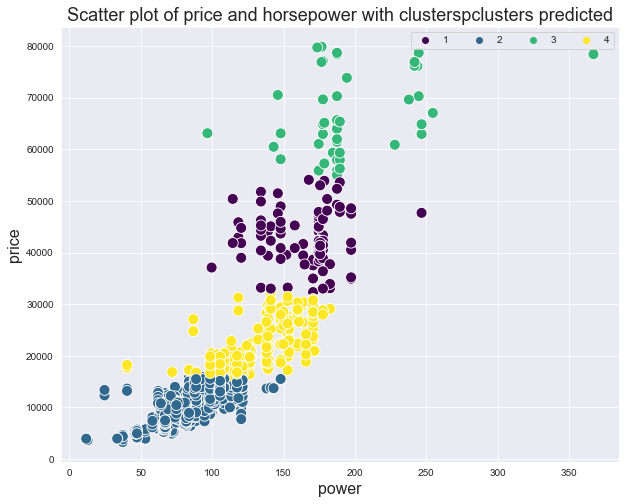

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='price', x='Power',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of price and horsepower with clusterspclusters predicted', fontsize=18)
plt.xlabel('power',fontsize=16)
plt.ylabel('price',fontsize=16);

**We can see the the clusters are strongly affected by the price with clear speration between clusters but it's kind of blurry when it comes to power**

Mileage vs Power

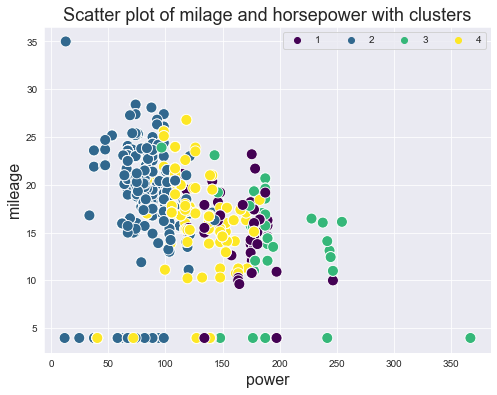

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Power', y='ARAI_Certified_Mileage',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('power',fontsize=16)
plt.ylabel('mileage',fontsize=16);

**But yet we can see that clusters speration in power is stronger than mileage which almost have no separation of clusters**

Engine size vs Fuel tank

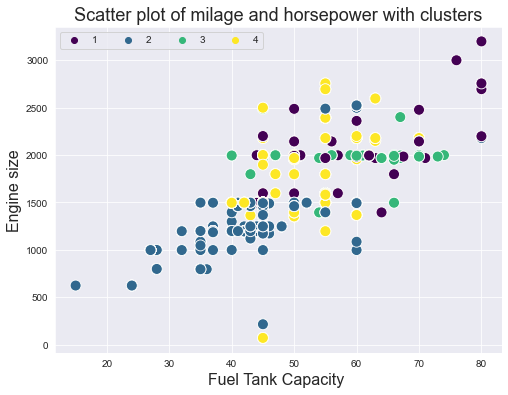

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Fuel_Tank_Capacity', y='Displacement',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('Fuel Tank Capacity ',fontsize=16)
plt.ylabel('Engine size',fontsize=16);

Now we make an interactive 3D scatter plot of price power, and mileage using also clusters

In [13]:
fig = px.scatter_3d(df, x='Power', z='price', y='ARAI_Certified_Mileage',color='cluster',
                    height=700, width=800,color_discrete_sequence=sns.color_palette('colorblind',n_colors=8,desat=1).as_hex(),
                   title='price power, and mileage')
fig.show()

**Now we check the average prices of each cluster**

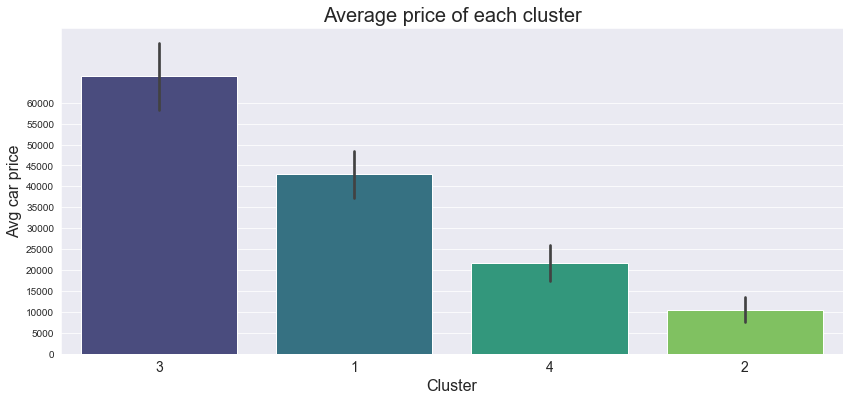

In [12]:

plt.figure(figsize=(14,6))
sns.barplot(data=df, x= 'cluster', ci= 'sd', y= 'price', palette='viridis',order=df.groupby('cluster')['price'].mean().sort_values(ascending=False).index);
plt.yticks([i for i in range(0,65000,5000)])
plt.title('Average price of each cluster',fontsize=20)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Avg car price', fontsize=16)
plt.xticks(fontsize=14);

**As shown in the scatter plits earlier there is a clear seperation of clusters when it comes to prices**

**Now we check how many cars exists in each cluster**

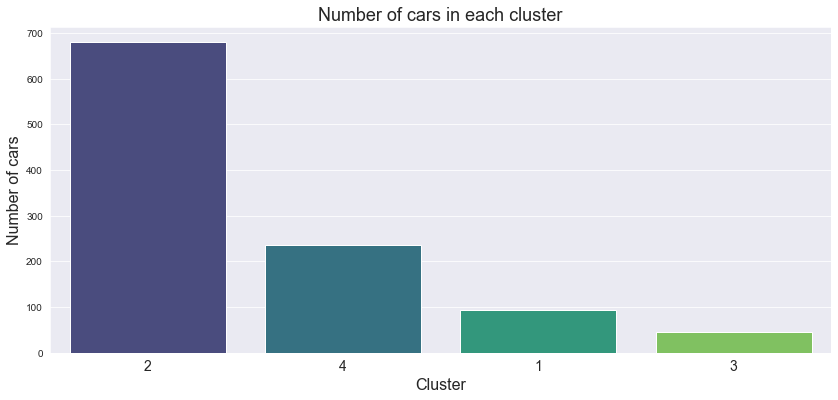

In [11]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x= 'cluster', palette='viridis',order=df.cluster.value_counts().index);
plt.title('Number of cars in each cluster',fontsize=18)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Number of cars', fontsize=16)
plt.xticks(fontsize=14);

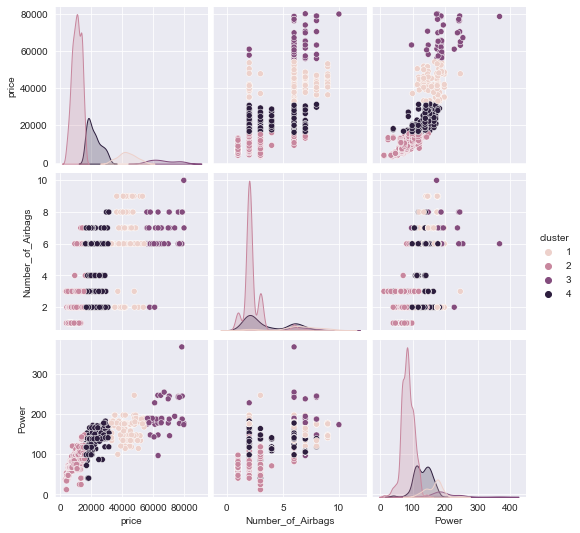

In [21]:
sns.pairplot(df,vars=['price','Number_of_Airbags', 'Power'],hue='cluster')

# Finding the potential strategic group

Cluster Analysis is mainly used for finding potential strategic group which is advantageous for a company of the field that is being analyzed.

**Lets choose a brand for this analysis I am chooseing Tata nexon and going to find the cluster it is from**

In [35]:
df.sample(10)
df[df.Model == 'Nexon']

Unnamed: 0  Make  Model                        Variant  Displacement  \
503         503  Tata  Nexon                             Xe          1198   
504         504  Tata  Nexon                             Xm          1198   
505         505  Tata  Nexon                             Xz          1198   
506         506  Tata  Nexon                        Xz Plus          1198   
507         507  Tata  Nexon              Xz Plus Dual Tone          1198   
508         508  Tata  Nexon                    Xz Plus (O)          1198   
509         509  Tata  Nexon          Xz Plus (O) Dual Tone          1198   
510         510  Tata  Nexon                            Xma          1198   
511         511  Tata  Nexon                       Xza Plus          1198   
512         512  Tata  Nexon             Xza Plus Dual Tone          1198   
513         513  Tata  Nexon                   Xza Plus (O)          1198   
514         514  Tata  Nexon         Xza Plus (O) Dual Tone          1198   
515         515  Tata  Nexon                      Xe Diesel          1497   
516         516  Tata  Nexon                      Xm Diesel          1497   
517         517  Tata  Nexon                      Xz Diesel          1497   
518         518  Tata  Nexon                 Xz Plus Diesel          1497   
519         519  Tata  Nexon       Xz Plus Diesel Dual Tone          1497   
520         520  Tata  Nexon             Xz Plus (O) Diesel          1497   
521         521  Tata  Nexon   Xz Plus (O) Diesel Dual Tone          1497   
522         522  Tata  Nexon                     Xma Diesel          1497   
523         523  Tata  Nexon                Xza Plus Diesel          1497   
524         524  Tata  Nexon      Xza Plus Diesel Dual Tone          1497   
525         525  Tata  Nexon            Xza Plus (O) Diesel          1497   
526         526  Tata  Nexon  Xza Plus (O) Diesel Dual Tone          1497   

     Cylinders  Valves_Per_Cylinder               Drivetrain  \
503          3                  4.0  FWD (Front Wheel Drive)   
504          3                  4.0  FWD (Front Wheel Drive)   
505          3                  4.0  FWD (Front Wheel Drive)   
506          3                  4.0  FWD (Front Wheel Drive)   
507          3                  4.0  FWD (Front Wheel Drive)   
508          3                  4.0  FWD (Front Wheel Drive)   
509          3                  4.0  FWD (Front Wheel Drive)   
510          3                  4.0  FWD (Front Wheel Drive)   
511          3                  4.0  FWD (Front Wheel Drive)   
512          3                  4.0  FWD (Front Wheel Drive)   
513          3                  4.0  FWD (Front Wheel Drive)   
514          3                  4.0  FWD (Front Wheel Drive)   
515          4                  4.0  FWD (Front Wheel Drive)   
516          4                  4.0  FWD (Front Wheel Drive)   
517          4                  4.0  FWD (Front Wheel Drive)   
518          4                  4.0  FWD (Front Wheel Drive)   
519          4                  4.0  FWD (Front Wheel Drive)   
520          4                  4.0  FWD (Front Wheel Drive)   
521          4                  4.0  FWD (Front Wheel Drive)   
522          4                  4.0  FWD (Front Wheel Drive)   
523          4                  4.0  FWD (Front Wheel Drive)   
524          4                  4.0  FWD (Front Wheel Drive)   
525          4                  4.0  FWD (Front Wheel Drive)   
526          4                  4.0  FWD (Front Wheel Drive)   

       Engine_Location Fuel_System  Fuel_Tank_Capacity Fuel_Type Body_Type  \
503  Front, Transverse   Injection                44.0    Petrol       SUV   
504  Front, Transverse   Injection                44.0    Petrol       SUV   
505  Front, Transverse   Injection                44.0    Petrol       SUV   
506  Front, Transverse   Injection                44.0    Petrol       SUV   
507  Front, Transverse   Injection                44.0    Petrol       SUV   
508  Front

**Since the cluster of Tata nexon is 2,4 hence we are going to see what other models and makers are present in those cluster**

In [22]:
df_c = df[df.cluster.isin([2,4])]
df_c['Make'].unique()
df_c['Model'].unique()

array(['Nano Genx', 'Redi-Go', 'Kwid', 'Eeco', 'Alto K10', 'Go',
       'Celerio Tour', 'Santro', 'Tiago', 'Celerio X', 'Ignis', 'Triber',
       'Rio', 'Etios Liva', 'Micra Active', 'Bolt', 'Xcent Prime',
       'Dzire Tour', 'Elite I20', 'Aura', 'Polo', 'Dzire', 'Freestyle',
       'Ameo', 'Aspire', 'Platinum Etios', 'Etios Cross', 'Verito Vibe',
       'Urban Cross', 'Glanza', 'Avventura', 'Jazz', 'Qute (Re60)',
       'Alto', 'S-Presso', 'Celerio', 'Grand I10 Prime', 'Kuv100 Nxt',
       'Swift', 'Altroz', 'Extreme', 'Tigor', 'Zest', 'Amaze', 'Gypsy',
       'Venue', 'Nexon', 'Linea', 'Bolero Power Plus', 'Vitara Brezza',
       'I20 Active', 'Ecosport', 'Duster', 'Verna', 'Xuv300', 'Lodgy',
       'Vento', 'E2O Plus', 'Tigor Ev', 'Brv', 'Thar', 'Gurkha', 'Xl6',
       'Abarth Avventura', 'Tuv300 Plus', 'Marazzo', 'Scorpio',
       'Monte Carlo', 'Xuv500', 'E Verito', 'Hexa', 'Innova Crysta',
       'Compass', 'Corolla Altis', 'Civic', 'Zs Ev', 'Omni', 'Go+',
       'Punto Evo Pure

**Giving some different color for Tata to analyze it with other to analyze it in a unique way**

In [23]:
p_dic = {'Datsun':'#46327e', 'Renault':'#46327e', 'Tata':'orange',
         'Maruti Suzuki':'#46327e', 'Hyundai':'#46327e', 'Premier':'#46327e',
         'Toyota':'#46327e','Nissan':'#46327e','Volkswagen':'#46327e','Ford':'#46327e','Mahindra':'#46327e','Fiat':'#46327e','Honda':'#46327e','Bajaj':'#46327e','Icml':'#46327e','Force':'#46327e','Skoda':'#46327e','Jeep':'#46327e','Mg':'#46327e','Kia':'#46327e','Isuzu':'#46327e','Maruti Suzuki R':'#46327e'}

In [24]:
c_dic = {'Nano Genx':'#46327e', 'Redi-Go':'#46327e', 'Kwid':'#46327e', 'Eeco':'#46327e', 'Alto K10':'#46327e', 'Go':'#46327e',
       'Celerio Tour':'#46327e', 'Santro':'#46327e', 'Tiago':'#46327e', 'Celerio X':'#46327e', 'Ignis':'#46327e', 'Triber':'#46327e',
       'Rio':'#46327e', 'Etios Liva':'#46327e', 'Micra Active':'#46327e', 'Bolt':'#46327e', 'Xcent Prime':'#46327e',
       'Dzire Tour':'#46327e', 'Elite I20':'#46327e', 'Aura':'#46327e', 'Polo':'#46327e', 'Dzire':'#46327e', 'Freestyle':'#46327e',
       'Ameo':'#46327e', 'Aspire':'#46327e', 'Platinum Etios':'#46327e', 'Etios Cross':'#46327e', 'Verito Vibe':'#46327e',
       'Urban Cross':'#46327e', 'Glanza':'#46327e', 'Avventura':'#46327e', 'Jazz':'#46327e', 'Qute (Re60)':'#46327e',
       'Alto':'#46327e', 'S-Presso':'#46327e', 'Celerio':'#46327e', 'Grand I10 Prime':'#46327e', 'Kuv100 Nxt':'#46327e',
       'Swift':'#46327e', 'Altroz':'#46327e', 'Extreme':'#46327e', 'Tigor':'#46327e', 'Zest':'#46327e', 'Amaze':'#46327e', 'Gypsy':'#46327e',
       'Venue':'#46327e', 'Nexon':'orange', 'Linea':'#46327e', 'Bolero Power Plus':'#46327e', 'Vitara Brezza':'#46327e',
       'I20 Active':'#46327e', 'Ecosport':'#46327e', 'Duster':'#46327e', 'Verna':'#46327e', 'Xuv300':'#46327e', 'Lodgy':'#46327e',
       'Vento':'#46327e', 'E2O Plus':'#46327e', 'Tigor Ev':'#46327e', 'Brv':'#46327e', 'Thar':'#46327e', 'Gurkha':'#46327e', 'Xl6':'#46327e',
       'Abarth Avventura':'#46327e', 'Tuv300 Plus':'#46327e', 'Marazzo':'#46327e', 'Scorpio':'#46327e',
       'Monte Carlo':'#46327e', 'Xuv500':'#46327e', 'E Verito':'#46327e', 'Hexa':'#46327e', 'Innova Crysta':'#46327e',
       'Compass':'#46327e', 'Corolla Altis':'#46327e', 'Civic':'#46327e', 'Zs Ev':'#46327e', 'Omni':'#46327e', 'Go+':'#46327e',
       'Punto Evo Pure':'#46327e', 'Figo':'#46327e', 'Baleno':'#46327e', 'Grand I10':'#46327e', 'Linea Classic':'#46327e',
       'Sunny':'#46327e', 'Ertiga':'#46327e', 'Baleno Rs':'#46327e', 'Wr-V':'#46327e', 'Tuv300':'#46327e', 'S-Cross':'#46327e',
       'Captur':'#46327e', 'Xylo':'#46327e', 'Seltos':'#46327e', 'Terrano':'#46327e', 'Safari Storme':'#46327e', 'Hector':'#46327e',
       'Nexon Ev':'orange', 'Elantra':'#46327e', 'Tucson':'#46327e', 'Alto 800 Tour':'#46327e', 'Grand I10 Nios':'#46327e',
       'Xcent':'#46327e', 'Micra':'#46327e', 'Bolero':'#46327e', 'Ciaz':'#46327e', 'Rapid':'#46327e', 'Abarth Punto':'#46327e',
       'Creta':'#46327e', 'Harrier':'#46327e', 'Dmax V-Cross':'#46327e', 'Wagon':'#46327e', 'Tiago Nrg':'#46327e',
       'Nuvosport':'#46327e', 'Kicks':'#46327e', 'Winger':'#46327e', 'Punto Evo':'#46327e', 'Yaris':'#46327e', 'Octavia':'#46327e',
       'Verito':'#46327e', 'City':'#46327e'}


**Now we check prices and number of cars in these clusters**

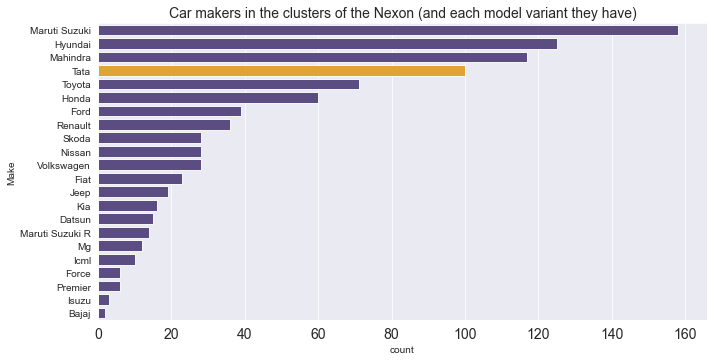

In [25]:
fig = plt.figure(figsize=(24,12))
grid =  gridspec.GridSpec(2, 2, figure= fig, hspace= .2, wspace=.2)
ax11 = fig.add_subplot(grid[0, 0])
order = list(df_c.Make.value_counts().index)

sns.countplot(data=df_c, y='Make', palette=p_dic, alpha= .9,order=order, ax= ax11)
ax11.set_title('Car makers in the clusters of the Nexon (and each model variant they have)', fontsize=14)
ax11.xaxis.set_tick_params(labelsize=14,rotation=0)





Text(0.5, 0, '')

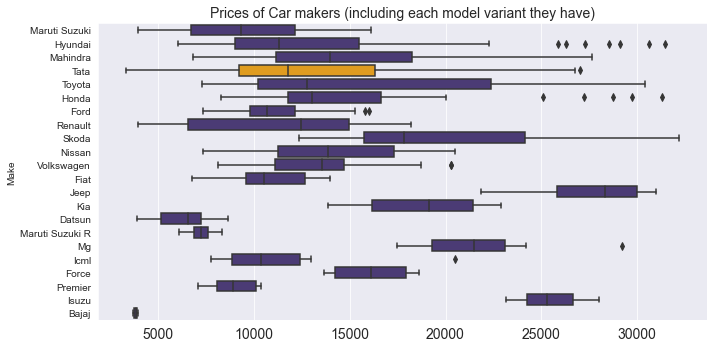

In [26]:
fig = plt.figure(figsize=(24,12))
grid =  gridspec.GridSpec(2, 2, figure= fig, hspace= .2, wspace=.2)
ax12 = fig.add_subplot(grid[0, 1])
order = list(df_c.Make.value_counts().index)

sns.boxplot(data= df_c, x= 'price', y='Make', order=order,palette=p_dic, ax=ax12)
ax12.xaxis.set_tick_params(labelsize=14,rotation=0)
ax12.set_title('Prices of Car makers (including each model variant they have)', fontsize=14)
ax12.set_xlabel('')

**Checking the other model varients in the same cluster as Tata nexon**

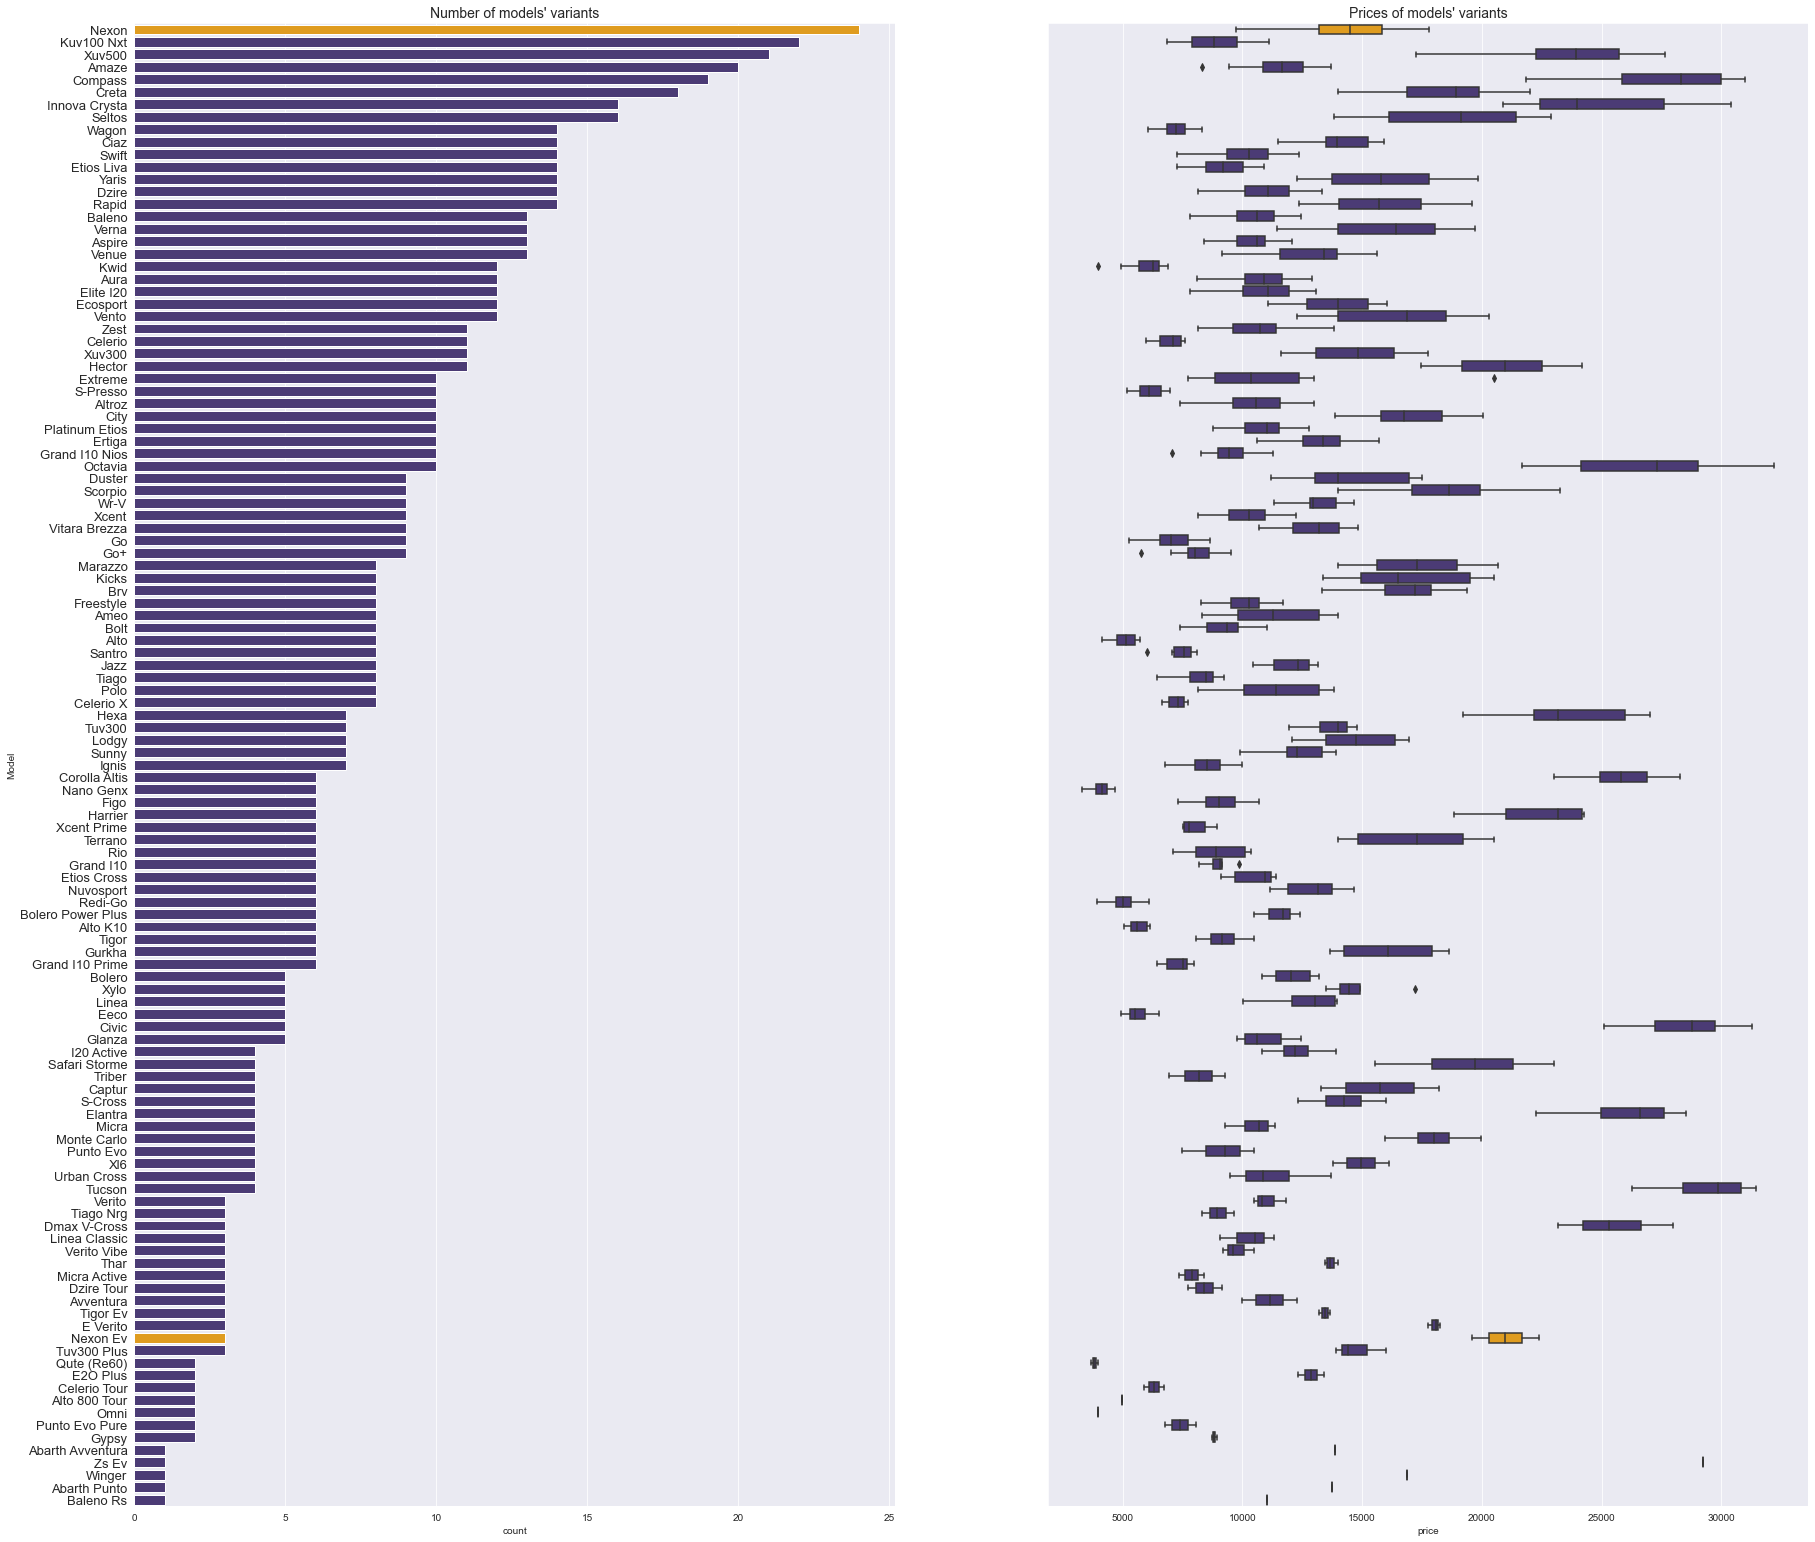

In [27]:
fig = plt.figure(figsize=(30,60))
grid =  gridspec.GridSpec(2, 2, figure= fig, hspace= .2, wspace=.2)
ax21 = fig.add_subplot(grid[1, 0])
ax22 = fig.add_subplot(grid[1, 1])
order = list(df_c.Make.value_counts().index)

o2 = list(df_c.Model.value_counts(ascending=False).index)
sns.countplot(data=df_c, y='Model', palette=c_dic, ax=ax21,order= o2)
ax21.yaxis.set_tick_params(rotation=0, labelsize=13)
ax21.set_title('Number of models\' variants', fontsize=14)

sns.boxplot(data=df_c, y='Model', x='price', ax=ax22, order=o2, palette=c_dic )
ax22.set_title('Prices of models\' variants', fontsize=14)
ax22.set_yticklabels([])
ax22.set_ylabel('');

In [28]:
px.box(data_frame=df_c,x='price',y='Model',height=500,  width=800,color='Model', color_discrete_sequence=list(c_dic.values()))

**Different body type varient in the same cluster**

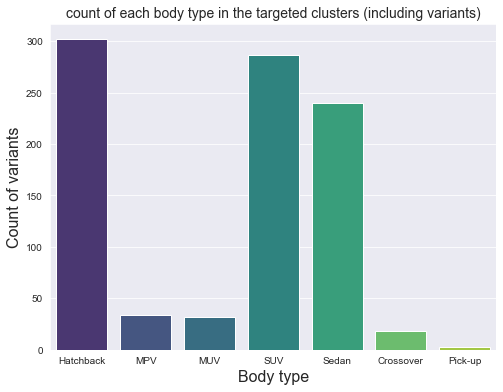

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_c,x='Body_Type',palette='viridis')
plt.xlabel('Body type',fontsize=16)
plt.ylabel('Count of variants',fontsize=16)
plt.title('count of each body type in the targeted clusters (including variants)',fontsize=14);

# Summary of Cluster Analysis

**Based on the above analysis we can analyze the Indian market more efficiently and thoroughly. We can see that all the cars are now seperated with clusters some cars may have same cluster which will help us to make a strategy to counter the compititon as a company. Companies can use cluster analysis to generate good strategy to lead the market.As we took an example of Tata nexon a car model manufactured by Tata one of the leading automobile company. We looked into the cluster it belongs to and analyzed it we saw that most varients are of the car makers in those clusters are Maruti Suzuki , Hyndai, Mahindra. With clustring there are too many variable taken in considration which are hard to be traced by normal methods. The clusters generated by the KMeans model can be used to identify what is the strategic group that form a strong competition to the company products in the market it also show the close clusters to this group which also can be put in considration in some cases.Though as tempting as it's to use clustring to produce strategic groups it worth mentioning that the clustring process itself is a little bit ambigous and features contribution to the clustering process can't be easily explained so the overall interpretability of the model forms a challenge.Clustring may be not determinant but it can be used to augment the management decision by using it side by side with human intuition to come out with the right strategic group.** 

In [91]:
df = pd.read_csv('final_df3.csv')

# Price Prediction(Using Different Machine Learning Algorithm)
![Machine Learning Image](ml.jpg)

#### Droping the feature Not so corelated to get the model with best accuracy

In [92]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

df.drop(['Rear_Track'],axis=1,inplace=True)

In [94]:
df.drop(['Audiosystem'],axis=1,inplace=True)
df.drop(['Basic_Warranty'],axis=1,inplace=True)
df.drop(['Extended_Warranty'],axis=1,inplace=True)
df.drop(['Third_Row_AC_Vents'],axis=1,inplace=True)
df.drop(['Airbags'],axis=1,inplace=True)
df.drop(['Fuel_Gauge'],axis=1,inplace=True)
df.drop(['Instrument_Console'],axis=1,inplace=True)
df.drop(['Fuel-lid_Opener'],axis=1,inplace=True)
df.drop(['Boot-lid_Opener'],axis=1,inplace=True)
df.drop(['Keyless_Entry'],axis=1,inplace=True)
df.drop(['Rear_Suspension'],axis=1,inplace=True)
df.drop(['Front_Suspension'],axis=1,inplace=True)
df.drop(['Drivetrain'],axis=1,inplace=True)
df.drop(['Engine_Location'],axis=1,inplace=True)
df.drop(['Model'],axis=1,inplace=True)
df.drop(['Variant'],axis=1,inplace=True)
# df.drop(['Model'],axis=1,inplace=True)
df.drop(['Second_Row_AC_Vents'],axis=1,inplace=True)

In [95]:

df.shape

(1276, 59)

### Using One Hot Encoding to convert Categorical values into numeric values with the help of get_dummy() function.

In [96]:
def category_onehot_multcols(multcolumns):
    df_final=final_data
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_data[fields],drop_first=True)
        
        final_data.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_data,df_final],axis=1)
        
    return df_final

In [98]:
df.drop(['ARAI_Certified_Mileage_for_CNG'],axis=1,inplace=True)

In [99]:
final_data = df.copy()
df['ARAI_Certified_Mileage'].isnull().sum()
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].fillna(df['ARAI_Certified_Mileage'].mean()) 


#### Columns which will get converted into numeric values using One Hot Encoding

In [100]:
columns=['Fuel_System','Fuel_Type','Front_Brakes','Rear_Brakes','Power_Steering','Power_Windows','Seats_Material','Type','Handbrake','Sun_Visor','Parking_Assistance','Infotainment_Screen','Seat_Height_Adjustment']

In [101]:
final_data.shape

(1276, 58)

#### Applying One Hot Encoding on the selected columns

In [102]:
final_data= category_onehot_multcols(columns)

Fuel_System
Fuel_Type
Front_Brakes
Rear_Brakes
Power_Steering
Power_Windows
Seats_Material
Type
Handbrake
Sun_Visor
Parking_Assistance
Infotainment_Screen
Seat_Height_Adjustment


In [103]:
final_data.shape

(1276, 84)

#### It is a statement which will drop the duplicated columns if duplicated during one hot encoding

In [104]:
final_data =final_data.loc[:,~final_data.columns.duplicated()]

In [105]:
final_data['price'].index

RangeIndex(start=0, stop=1276, step=1)

In [106]:
final_data.columns.get_loc('price')

44

#### Distributing the data based on dependent and independent variable

In [107]:
x = final_data.loc[:, final_data.columns != "price"]
y = final_data.iloc[:,44]

In [115]:
x.drop(['Power_Seats'],axis=1,inplace=True)

In [110]:
x.drop(['Make'],axis=1,inplace=True)

In [112]:
x.drop(['Body_Type'],axis=1,inplace=True)

In [113]:
y.head()

0    4097
1    3310
2    4153
3    4686
4    3811
Name: price, dtype: int64

#### Using ExtraTreesRegressor to check the feature importance

In [116]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [117]:
print(model.feature_importances_)

[2.72569140e-01 3.26329186e-01 6.49547375e-04 1.13531679e-02
 2.60225775e-03 9.33835811e-03 4.63901930e-03 4.28672541e-03
 2.50035487e-01 5.69429930e-02 2.47688467e-03 1.32381347e-03
 1.22307067e-04 1.99946330e-03 1.24103009e-04 1.41742418e-03
 1.91852291e-04 5.22758312e-04 1.68088160e-04 2.14343616e-04
 5.02172548e-05 5.09757801e-03 1.62211087e-04 3.32225916e-04
 2.19626077e-03 1.57620766e-04 1.38413112e-04 9.89888495e-05
 1.95207737e-04 1.65608669e-03 3.90499304e-03 1.26000392e-04
 1.35791743e-04 1.92148349e-04 4.90293903e-05 1.90620534e-04
 1.15417638e-03 9.62676871e-04 1.56209316e-04 2.21060420e-03
 9.86464874e-05 1.20606749e-02 1.72449035e-08 2.68377266e-04
 8.28150233e-06 9.29051004e-04 6.81982439e-04 1.23123399e-04
 8.11861953e-04 2.05740974e-03 1.43843078e-03 6.06760087e-04
 2.43704971e-04 3.64642619e-04 2.15321007e-08 5.36052854e-08
 5.16919554e-04 7.64279042e-08 6.47980245e-06 4.53697821e-04
 4.90193597e-05 1.78181741e-06 1.12113028e-03 6.74533405e-06
 3.09362139e-06 9.395073

In [118]:
x.shape

(1276, 76)

#### Plotting a graph based on feature importance of top 20 features

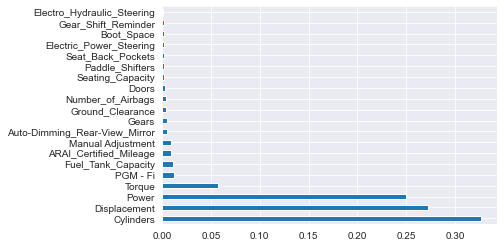

In [119]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh',)
plt.show()

In [135]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
print(feat_importances.nlargest(60))

Cylinders                                    0.326329
Displacement                                 0.272569
Power                                        0.250035
Torque                                       0.056943
PGM - Fi                                     0.012061
Fuel_Tank_Capacity                           0.011353
ARAI_Certified_Mileage                       0.009338
Manual Adjustment                            0.009180
Auto-Dimming_Rear-View_Mirror                0.005098
Gears                                        0.004639
Ground_Clearance                             0.004287
Number_of_Airbags                            0.003905
Doors                                        0.002602
Seating_Capacity                             0.002477
Paddle_Shifters                              0.002211
Seat_Back_Pockets                            0.002196
Electric_Power_Steering                      0.002057
Boot_Space                                   0.001999
Gear_Shift_Reminder         

#### Spliting the data into training set and test set with the help of train_test_split library of python

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#### Hyperparameter Tunning and using Randomized Search Cv to select the best parameter and also Importing Random Forest Regressor since it is regression problem.

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [167]:
regressor=RandomForestRegressor()

In [193]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 12)]
print(n_estimators)

[100, 272, 445, 618, 790, 963, 1136, 1309, 1481, 1654, 1827, 2000]


In [194]:
from sklearn.model_selection import RandomizedSearchCV

In [195]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 272, 445, 618, 790, 963, 1136, 1309, 1481, 1654, 1827, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [196]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [197]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=1)

In [198]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1481; total time=   2.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1481; total time=   2.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1481; total time=   4.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1481; total time=   2.7s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1481; total time=   2.9s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1827; total time=   2.7s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1827; total time=   2.9s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 272, 445, 618,
                                                         790, 963, 1136, 1309,
                                                         1481, 1654, 1827,
                                                         2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

#### Best parameter

In [186]:
rf_random.best_params_

{'n_estimators': 1327,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110}

In [187]:
rf_random.best_score_

-5699182105.2353

In [188]:
predictions=rf_random.predict(X_test)

#### Ploting the graph to visualize The prediction distribution

<AxesSubplot:xlabel='price', ylabel='Density'>

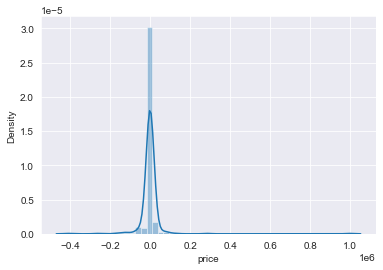

In [189]:
sns.distplot(y_test-predictions)

#### The distribution is forming a normal distribution hence it is decent model

#### Ploting a scatter plot to look into it weather the distribution is linear or not

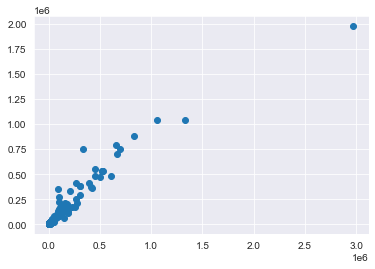

In [190]:
plt.scatter(y_test,predictions)


The graph is showing us the linear distribution hence it is decent distribution

**Importing metrices Mean Absolute Error(MAE),Mean Squared Error(MSE),Relative Mean Squared Error(RMSE)**

In [192]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 13803.898739774892
MSE: 4002455412.895644
RMSE: 63264.96196865722


**Importing Pickle to get the pickle file which will be used into web app**

In [198]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

#### Importing XGBoost which is a machine learning algorithm

In [239]:
import xgboost 

xgboost.set_config(verbosity=0)

regressor = xgboost.XGBRegressor()

#### Hyperparameter tunning

In [240]:
#Hyperparameter tunning
booster =['gblinear' , 'gbtree']
base_score = [0.25,0.5,0.75,1]

In [241]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]


hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

**Using Randomized Search to get best parameter**

In [242]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train , y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   param

#### best parameter

In [243]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [249]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [250]:
regressor.fit(X_train , y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [256]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
test_scaled = scale.fit_transform(X_test)
y_hat = regressor.predict(test_scaled)

In [251]:
from sklearn.model_selection import cross_val_score

xgb = cross_val_score(regressor  ,X_train , y_train, cv=5)

#### Looking into Cross val score, mean and other metrices like MAE,MSE,RMSE

In [252]:
from numpy.ma.core import mean
print(xgb)
xgb.mean()

[0.89775422 0.88774141 0.64670259 0.86089719 0.95771904]


0.8501628905166726

In [257]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_hat))
print('MSE:', metrics.mean_squared_error(y_test, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

MAE: 64382.42930503427
MSE: 39767889918.77893
RMSE: 199418.88054740184
